In [1]:
from platform import python_version

print(python_version())

3.7.3


In [2]:
# It returns "32" for 32-bit and "64" for 64-bit
>>> import struct
>>> print(struct.calcsize("P")*8)

64


## Packages

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import sklearn
import IPython
from IPython import display

#Common Model Algorithms
from sklearn import tree, linear_model, ensemble

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [4]:
#Configure Visualization Defaults:
#matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 20,14 #was 14,8

## Import raw data

In [5]:
raw_data=pd.read_csv("full.csv")
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
raw_data.describe(include='all') 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [7]:
raw_data.shape

(41188, 21)

In [8]:
raw_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Missing Data

In [9]:
#Show which values are missing:
print('Missing Data:\n', raw_data.isna().sum())
print("-"*10)

#No missing data:

Missing Data:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
----------


In [10]:
#See the % of "unknown" data points in each column:

raw_data_unknown=raw_data.copy()
raw_data_unknown.replace('unknown', np.NaN, inplace=True)
raw_data_unknown.isnull().sum()/len(raw_data_unknown)*100

#we see a high % of unknown data in defeault. 20%
#4% in education

#all unknown data is categorical, so cant fill in missing data with median or mode, since not continous

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [11]:
x_raw=raw_data.drop(['y'], axis=1).copy()
y_raw = raw_data['y'].copy()

Encode target column:

In [12]:
label = LabelEncoder()
raw_data['y']=label.fit_transform(raw_data['y']).astype(np.int64)
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
raw_data[raw_data['y']==1].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


In [14]:
raw_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

## Discrete Variable Correlation by "y" (has the client subscribed a term deposit?)

In [15]:
x_features =raw_data.columns[:-1]
Target = ['y']

for x in x_features:
    if raw_data[x].dtype != 'float64':
        print('Subscribed Correlation by:', x)
        print(raw_data[[x, Target[0]]].groupby(x, as_index=False).mean().sort_values(Target[0],ascending=False))
        print('-'*10, '\n')

Subscribed Correlation by: age
    age         y
77   98  1.000000
72   89  1.000000
70   87  1.000000
74   92  0.750000
60   77  0.650000
65   82  0.647059
69   86  0.625000
63   80  0.580645
59   76  0.529412
48   65  0.522727
61   78  0.518519
49   66  0.508772
62   79  0.500000
2    19  0.476190
47   64  0.473684
66   83  0.470588
57   74  0.468750
68   85  0.466667
58   75  0.458333
51   68  0.454545
44   61  0.438356
1    18  0.428571
67   84  0.428571
50   67  0.423077
52   69  0.411765
71   88  0.409091
53   70  0.404255
45   62  0.403226
64   81  0.400000
0    17  0.400000
..  ...       ...
39   56  0.113636
14   31  0.112994
17   34  0.105444
35   52  0.103979
21   38  0.101635
41   58  0.100694
15   32  0.099675
33   50  0.099429
31   48  0.099081
40   57  0.095975
34   51  0.095491
18   35  0.094940
37   54  0.093567
20   37  0.092881
36   53  0.092769
24   41  0.088419
19   36  0.086517
38   55  0.086420
26   43  0.083412
28   45  0.083409
25   42  0.079685
22   39  0.0796

In [16]:
#Cross Tab analysis:

for j in x_features:
    if raw_data[j].dtype == 'object':
        print('Subscribed Count by:', j)
        print(pd.crosstab(raw_data[j],raw_data[Target[0]]))
        print('-'*10, '\n')

Subscribed Count by: job
y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37
---------- 

Subscribed Count by: marital
y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12
---------- 

Subscribed Count by: education
y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251
---------- 

Subscribed Count by: default
y            0     1


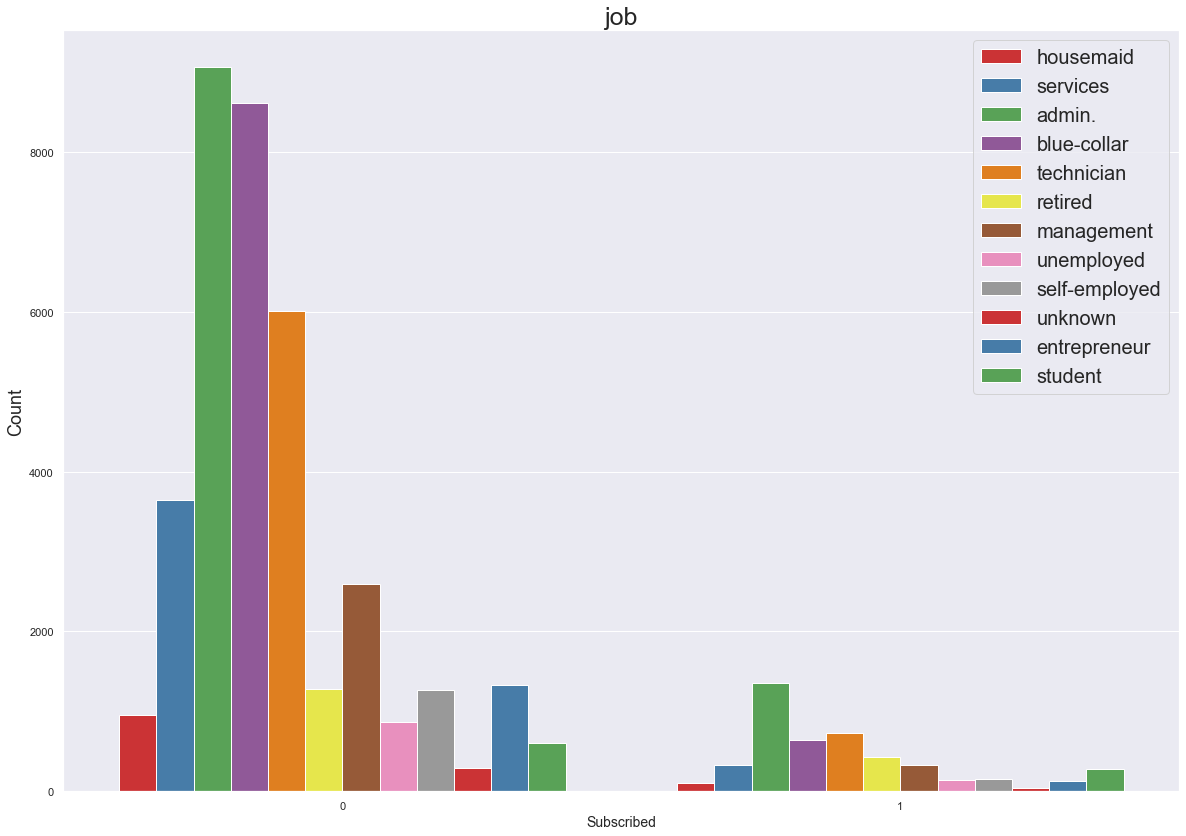

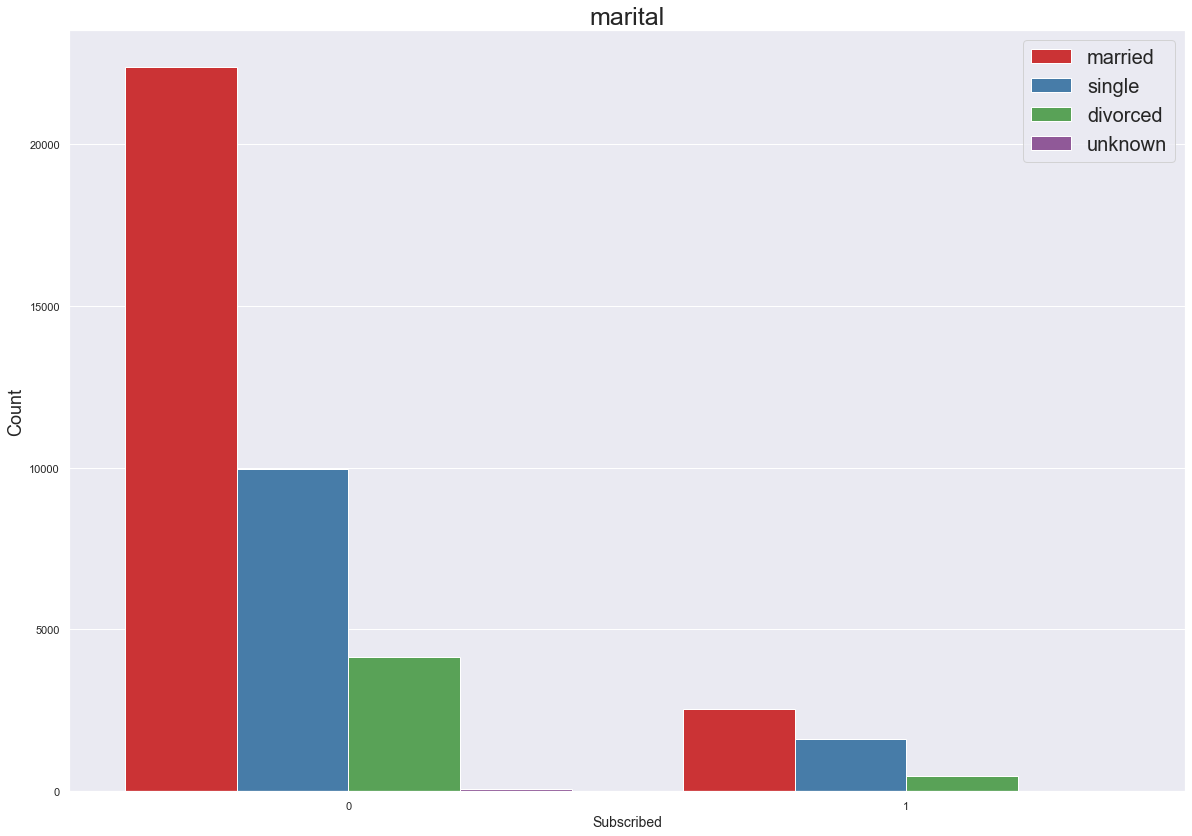

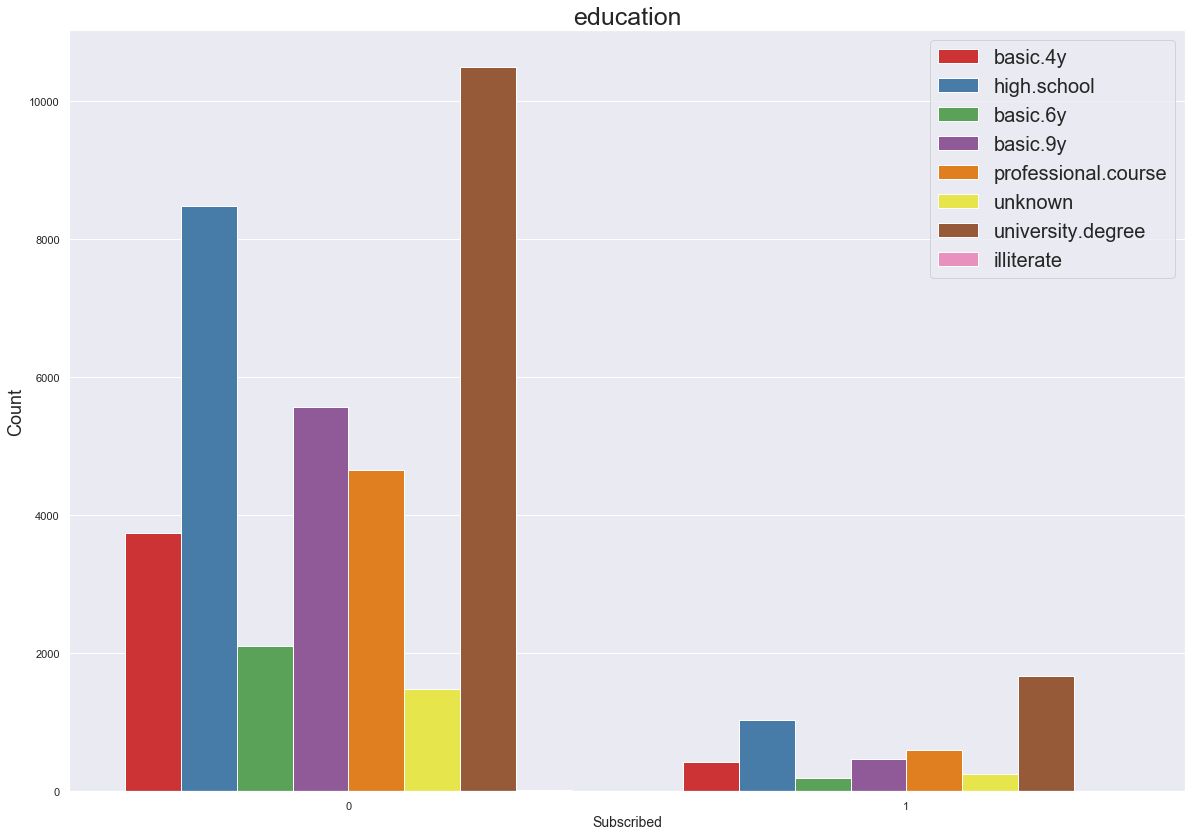

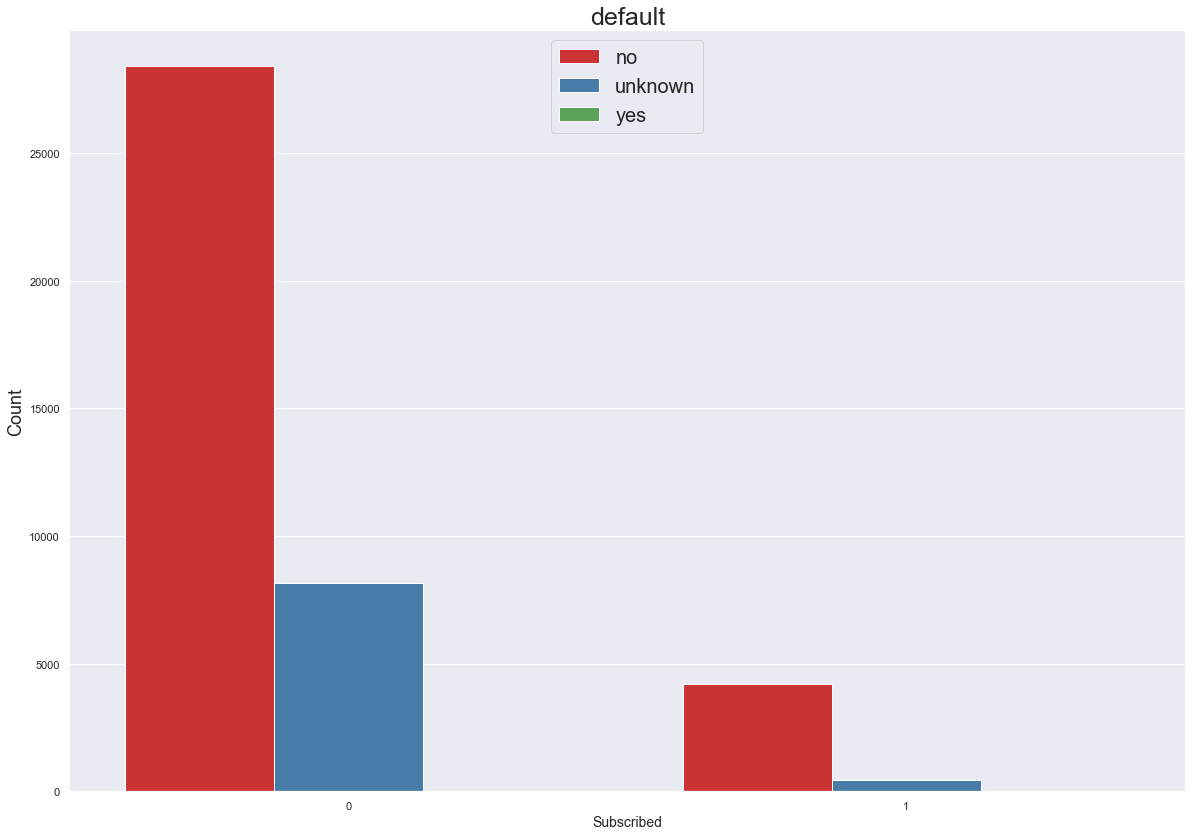

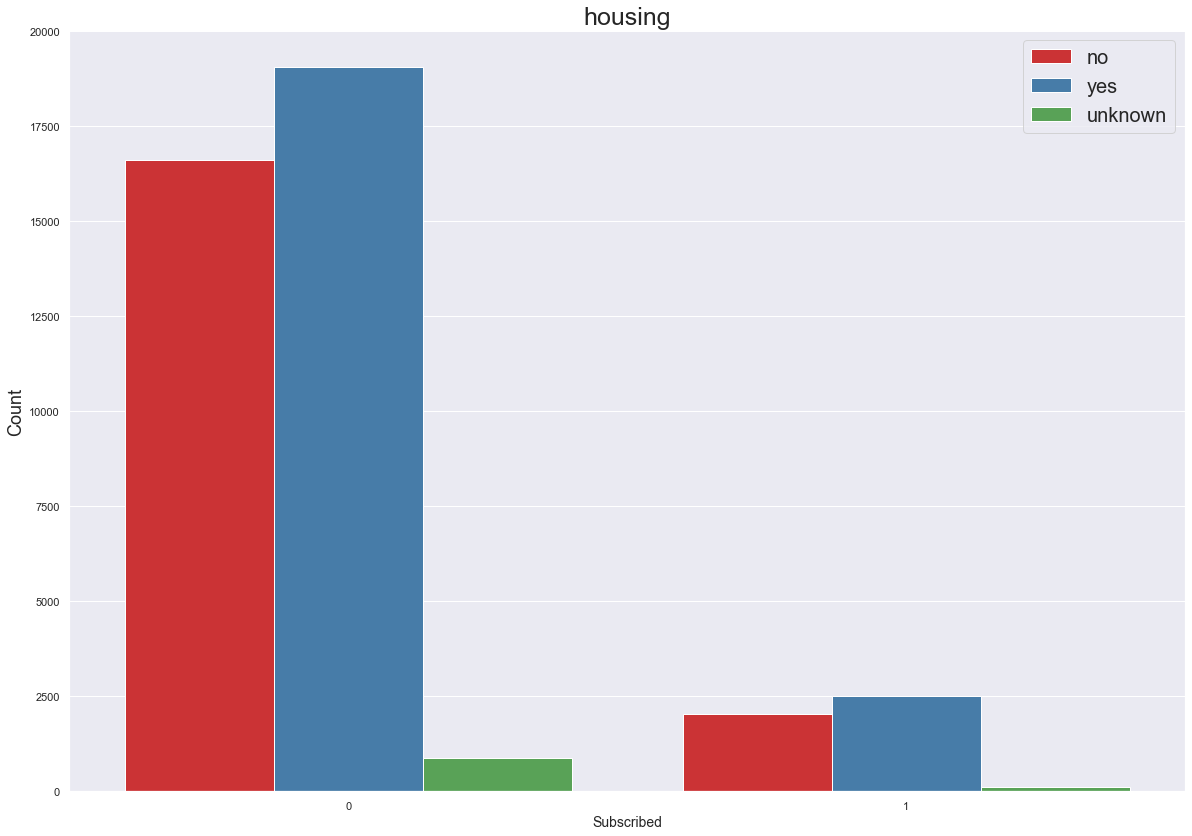

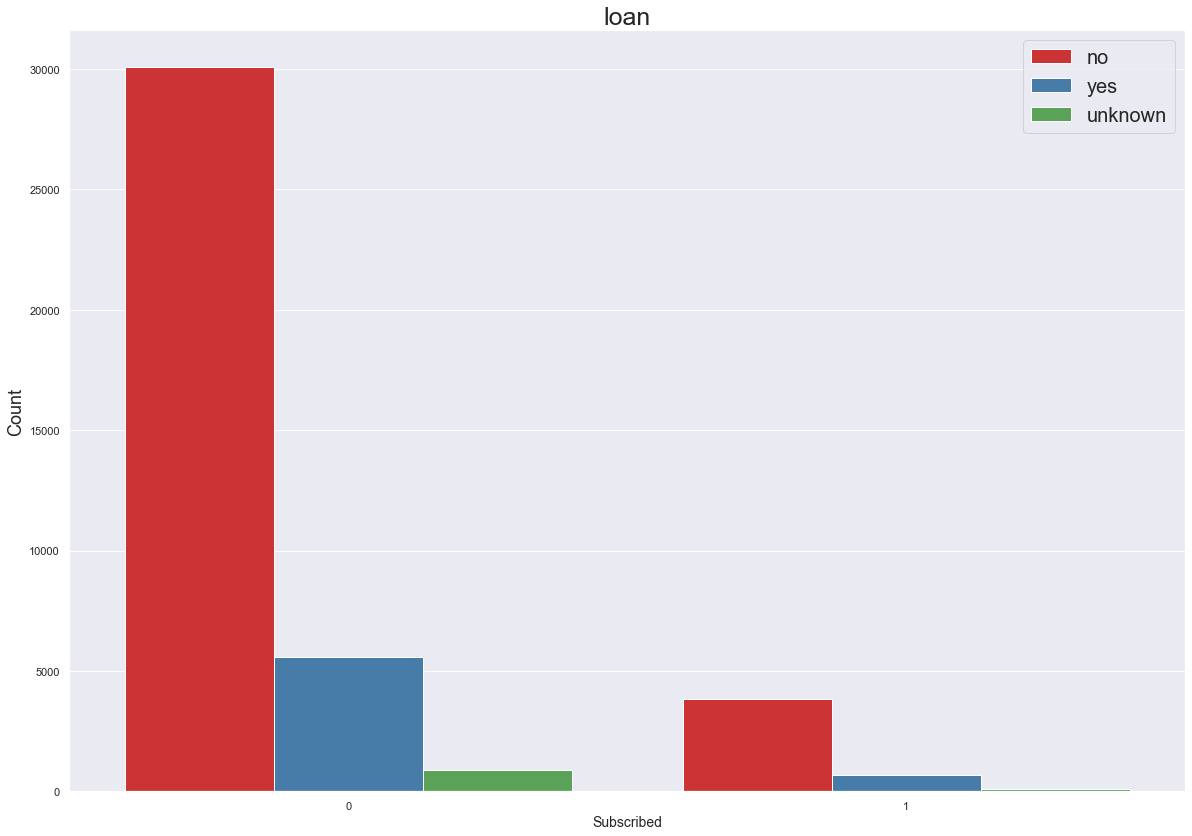

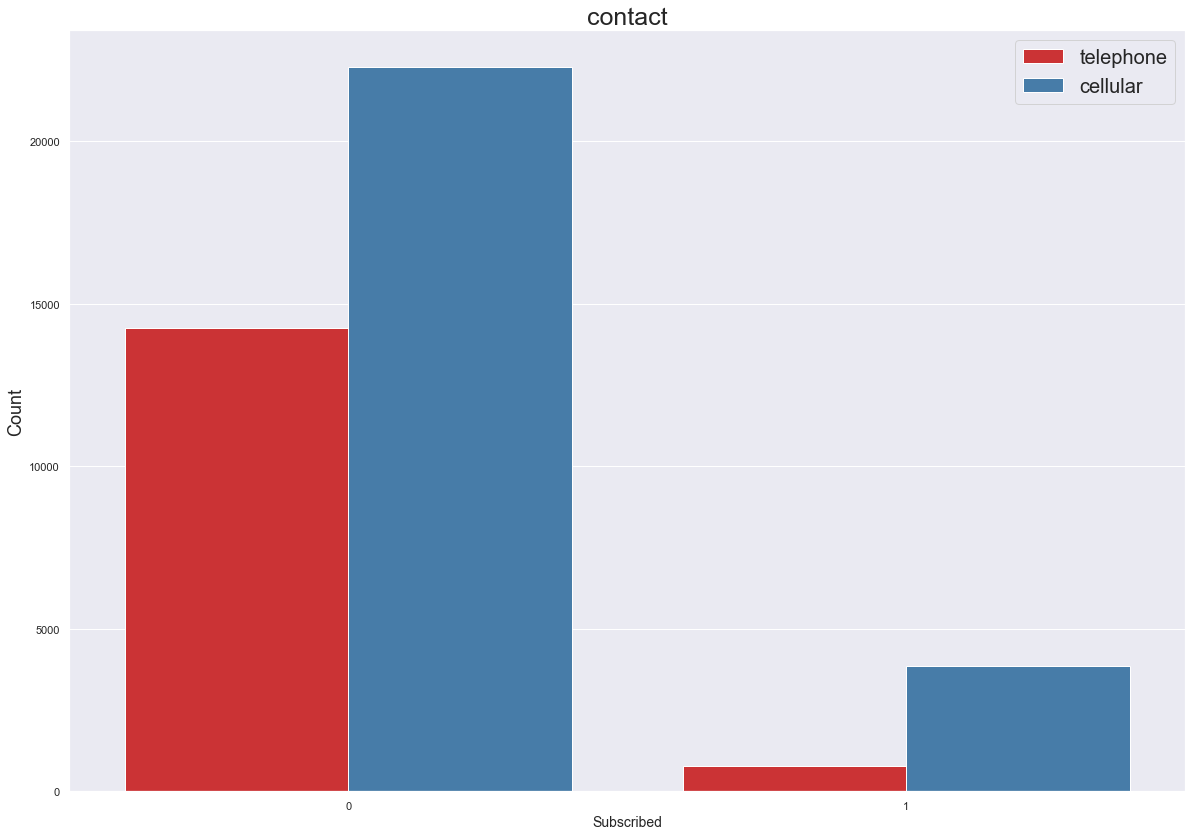

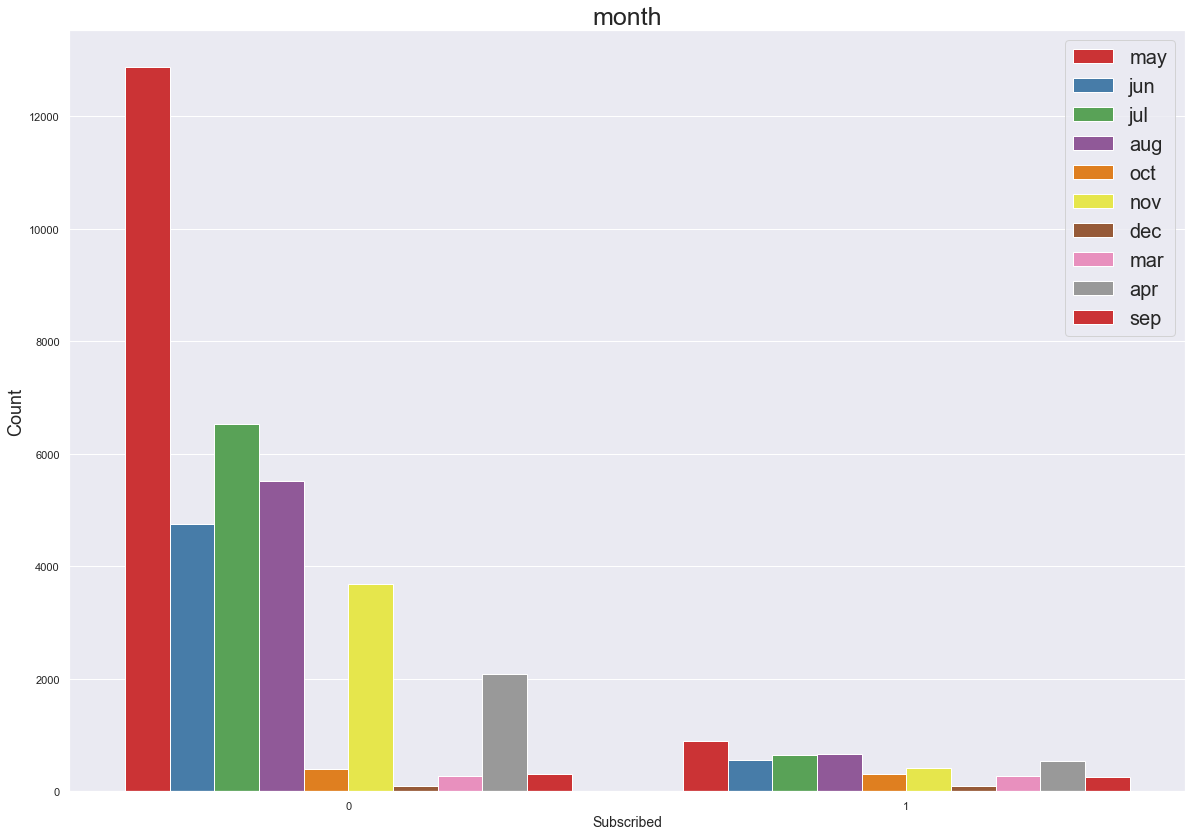

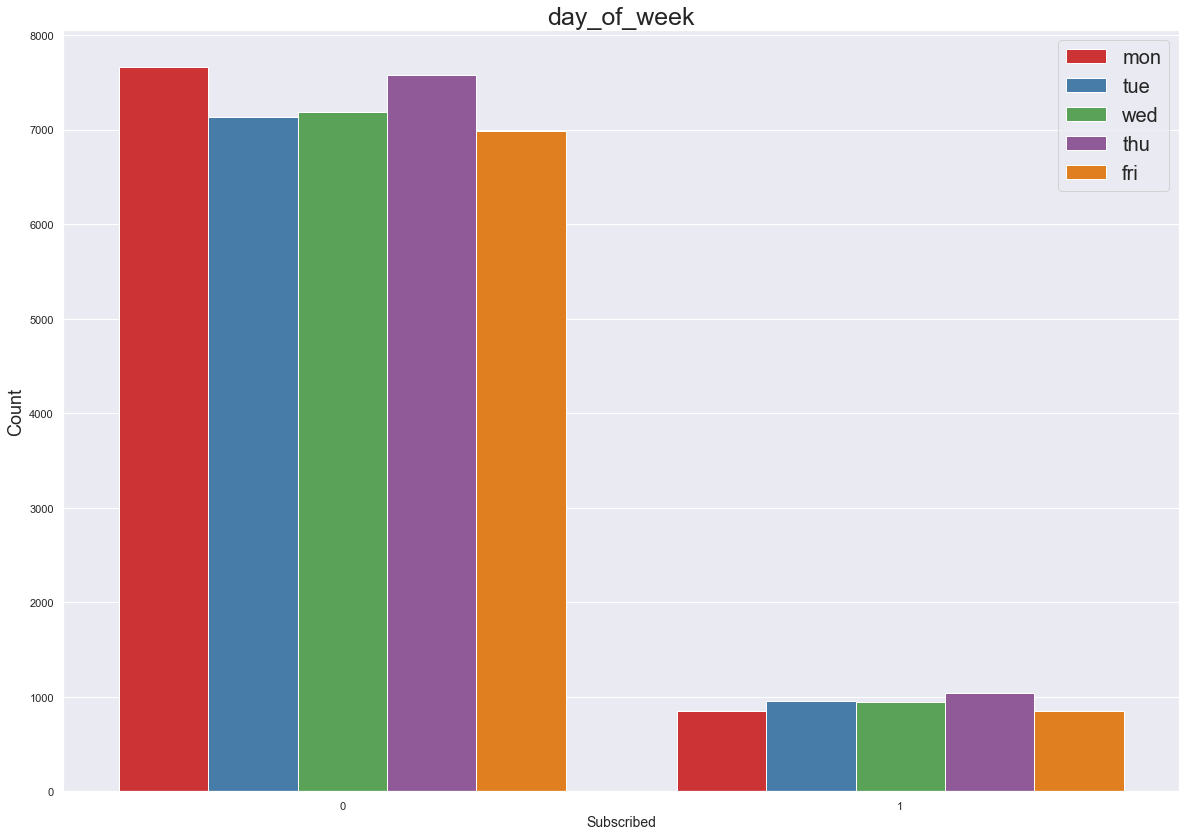

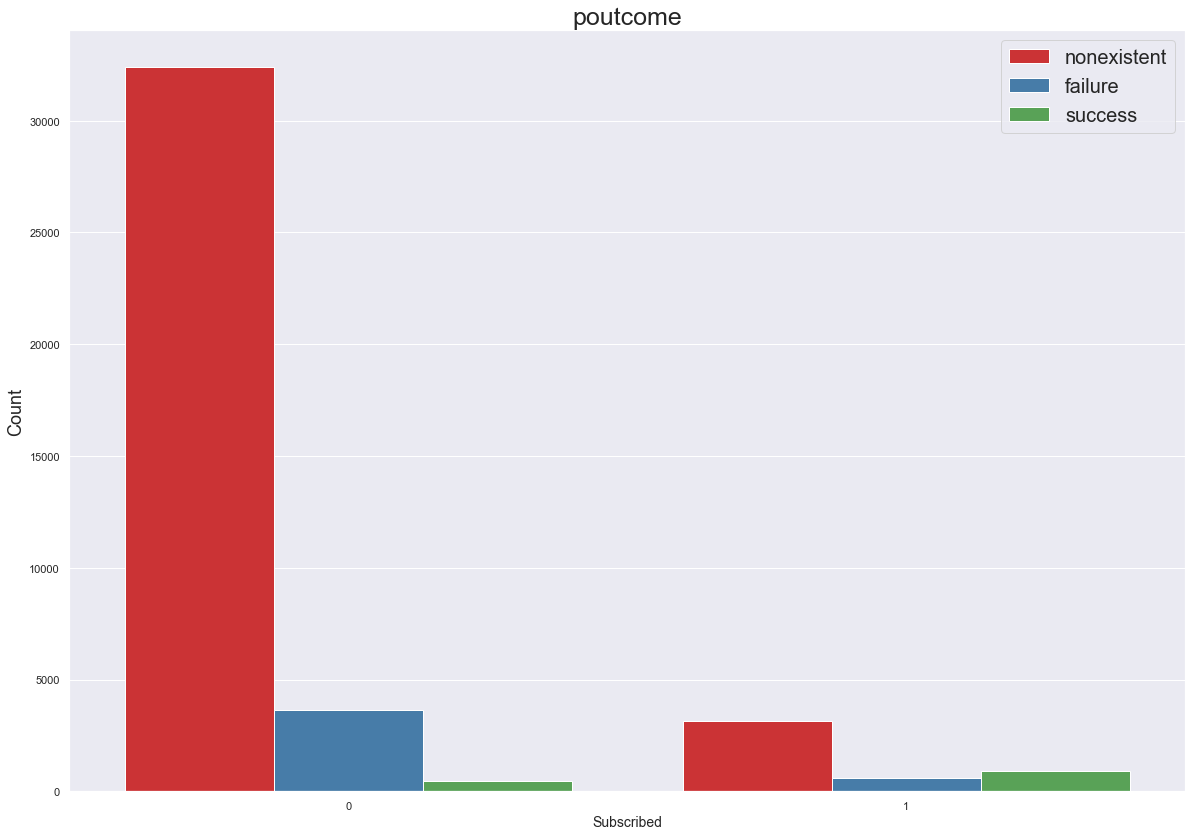

<Figure size 1440x1008 with 0 Axes>

In [17]:
#Visulaztion of crosstabs above, just looking at object (categorical data)

sns.set(style="darkgrid")

for i in x_features:
    if raw_data[i].dtype == 'object':
        axes=sns.countplot( x='y', data=raw_data, hue=i, palette="Set1")
        plt.title(i,fontsize=25)
        axes.legend(fontsize=20)
        plt.xlabel('Subscribed', fontsize = 14)
        plt.ylabel('Count', fontsize = 18)
        plt.figure()

#2 - job : type of job
#(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

#3 - marital : marital status
#(categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

#4 - education
#(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
#8 - contact: contact communication type (categorical: 'cellular','telephone')
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

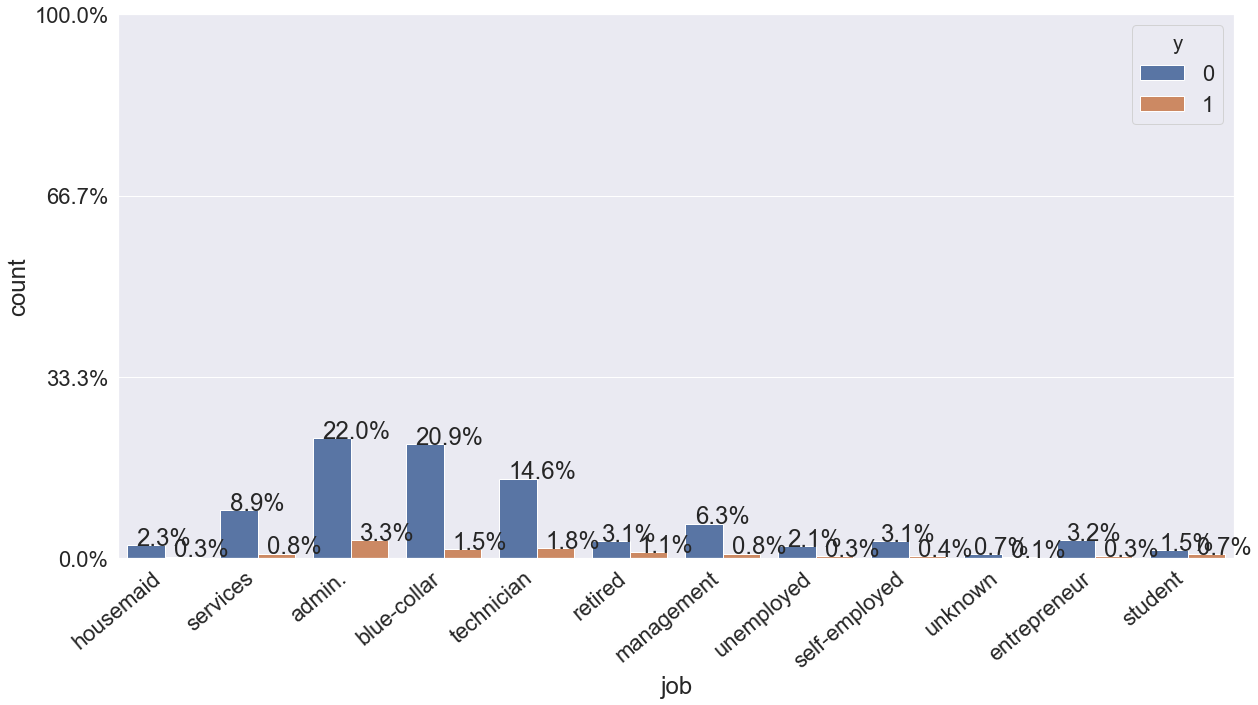

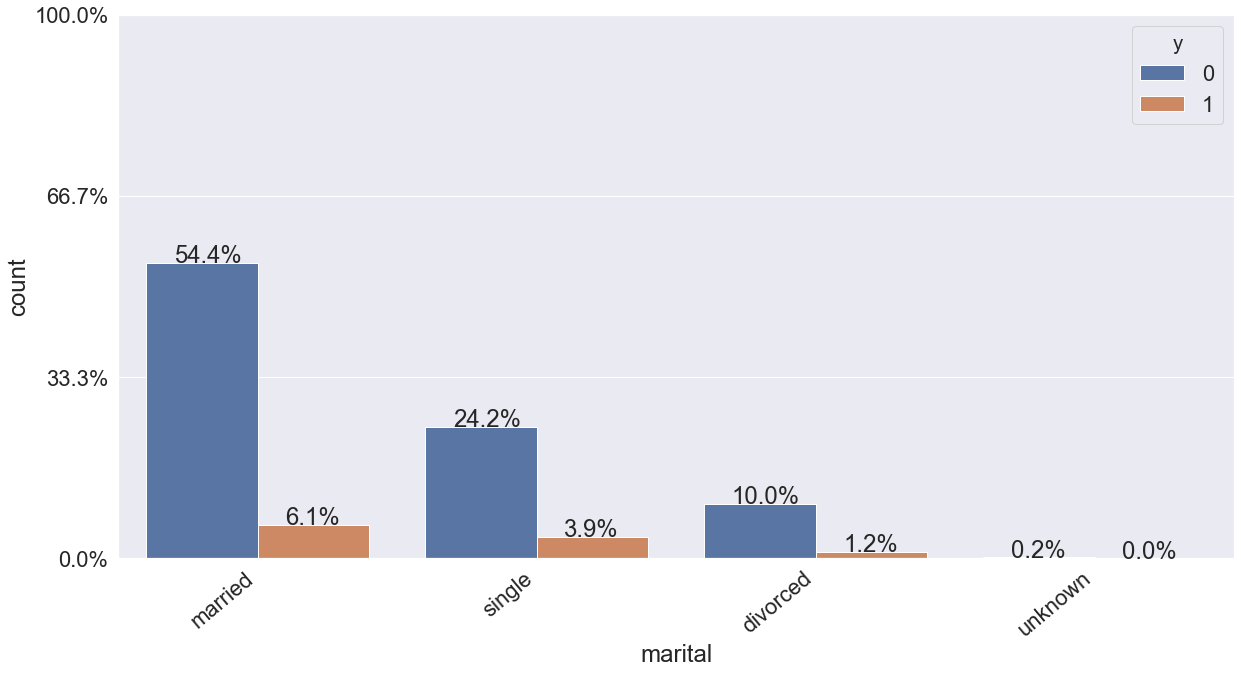

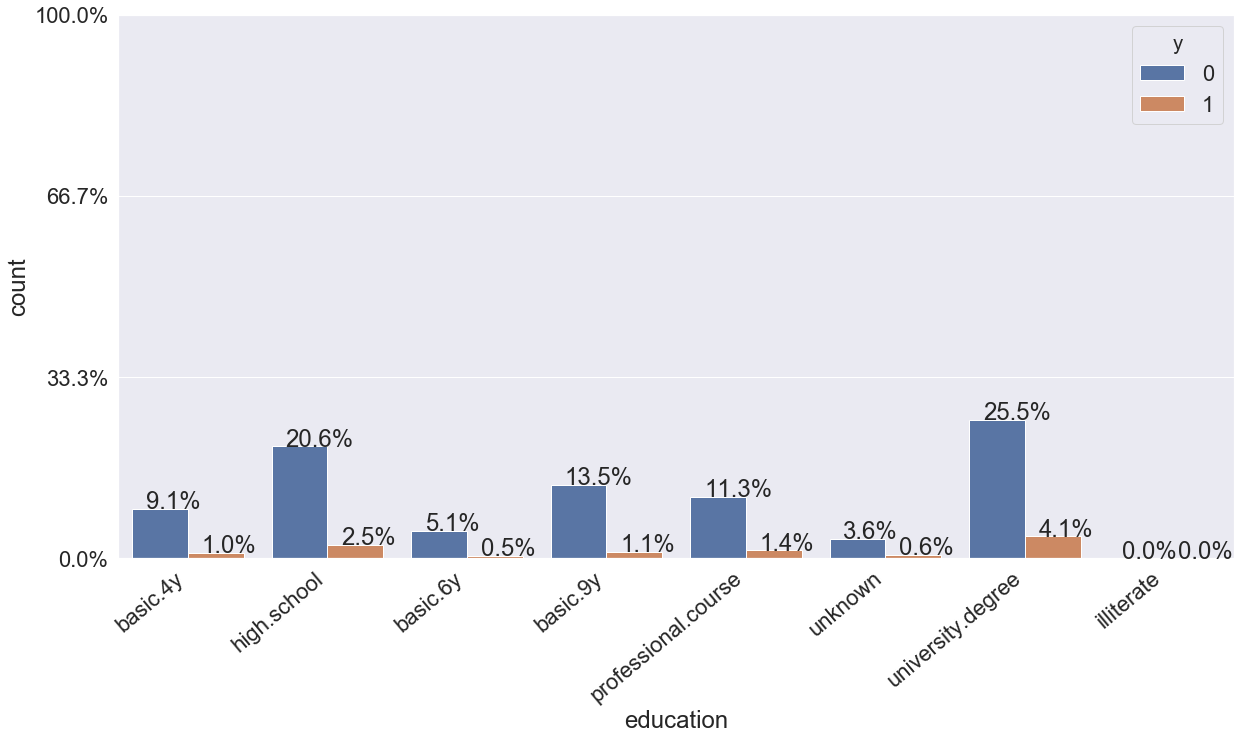

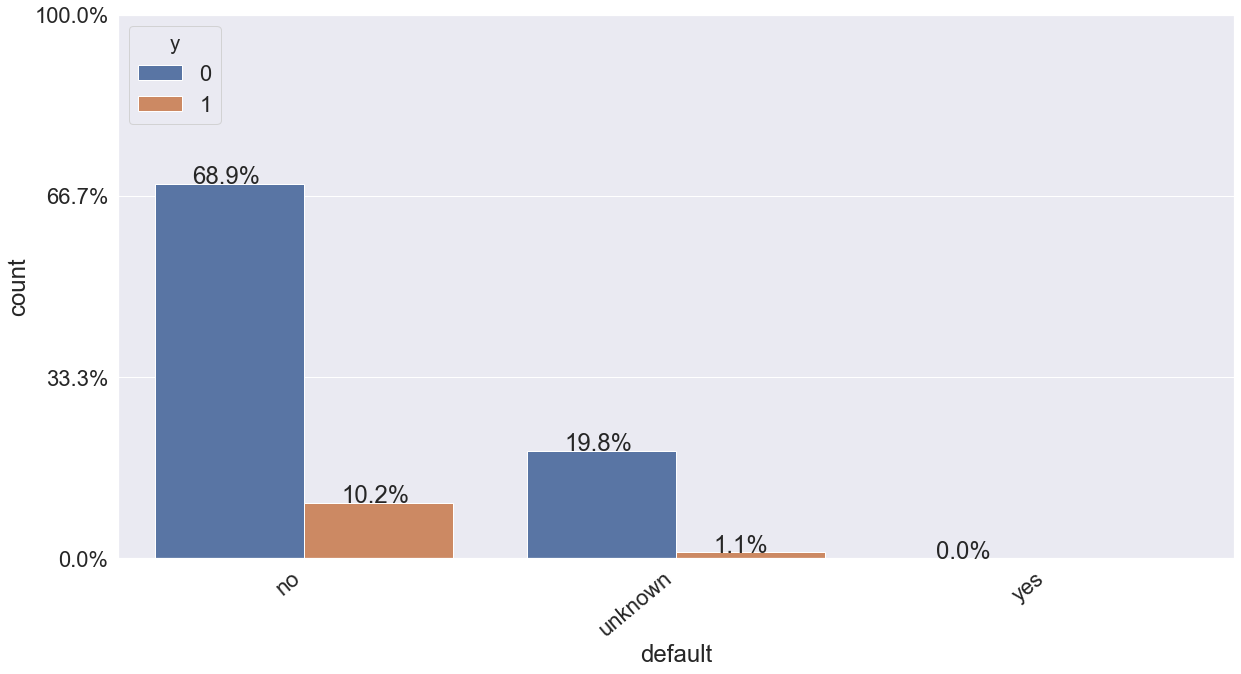

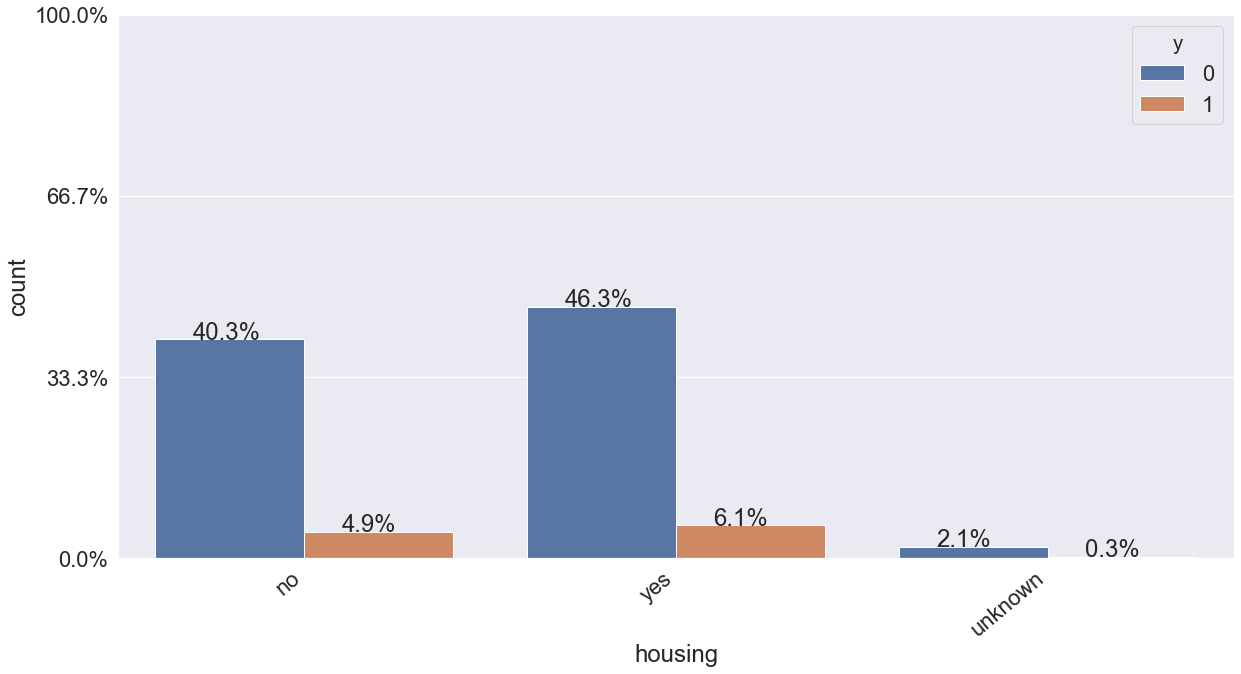

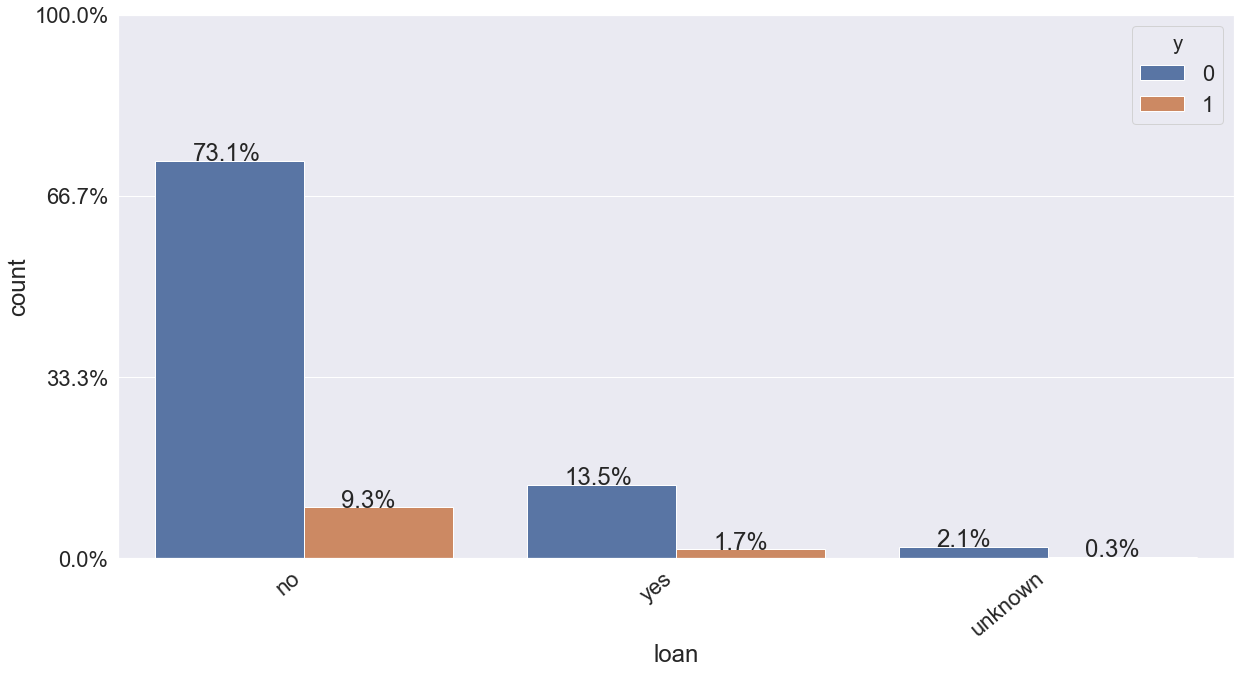

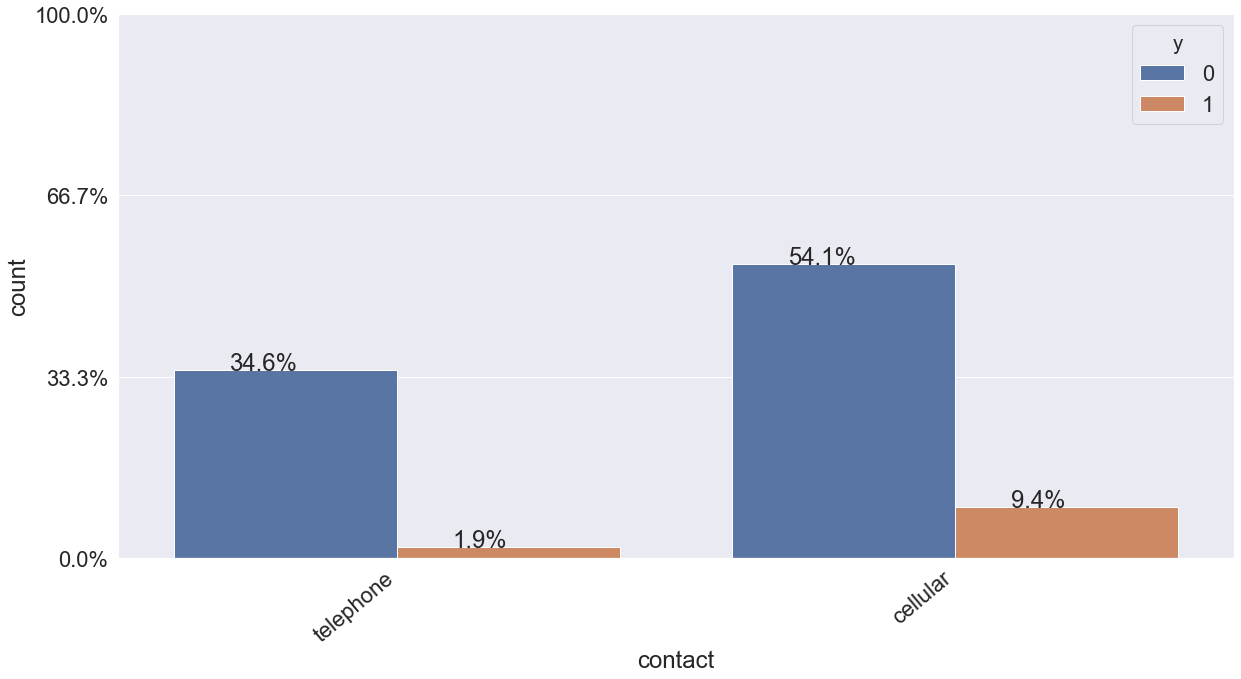

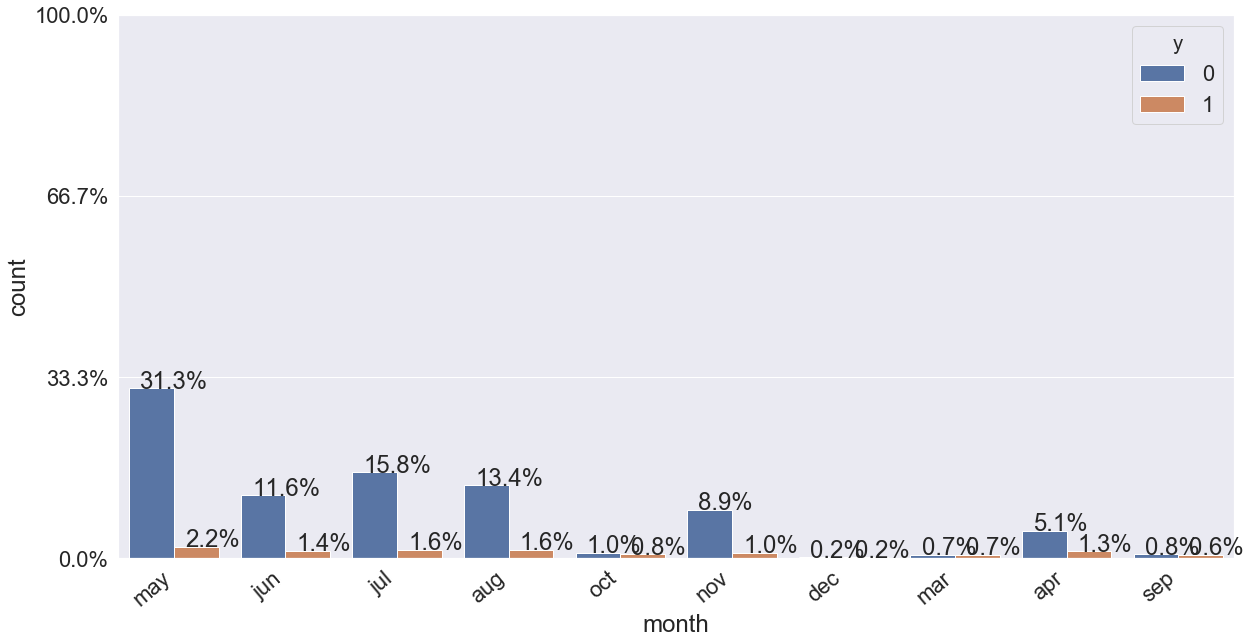

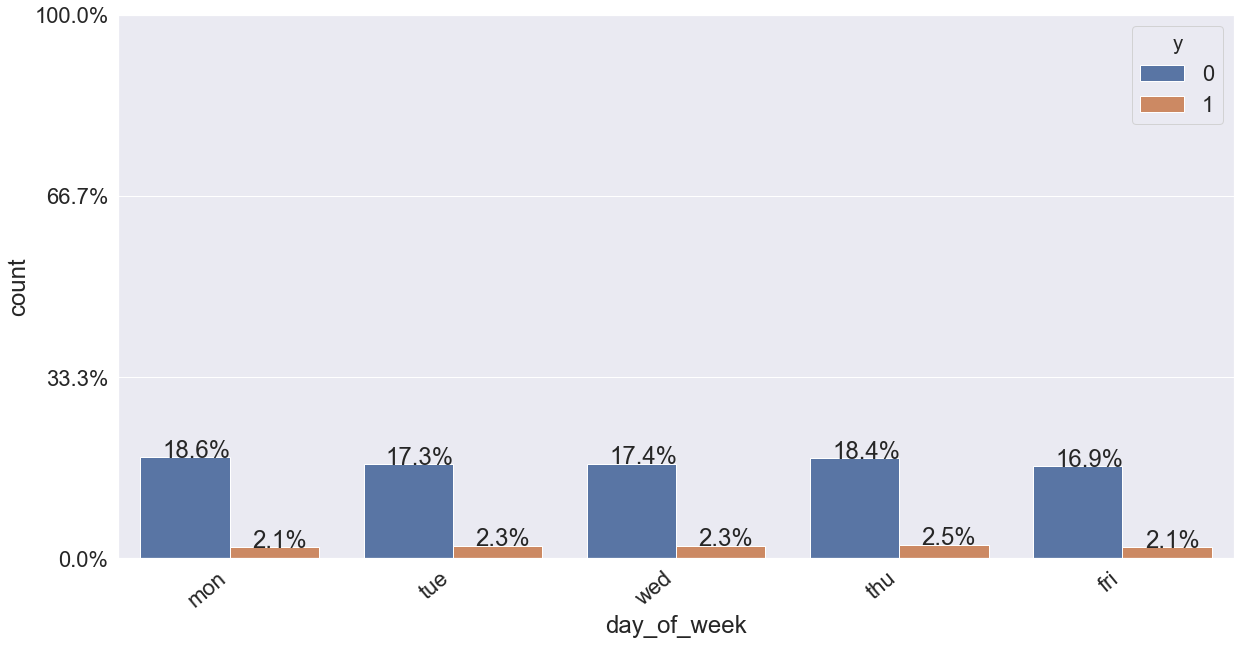

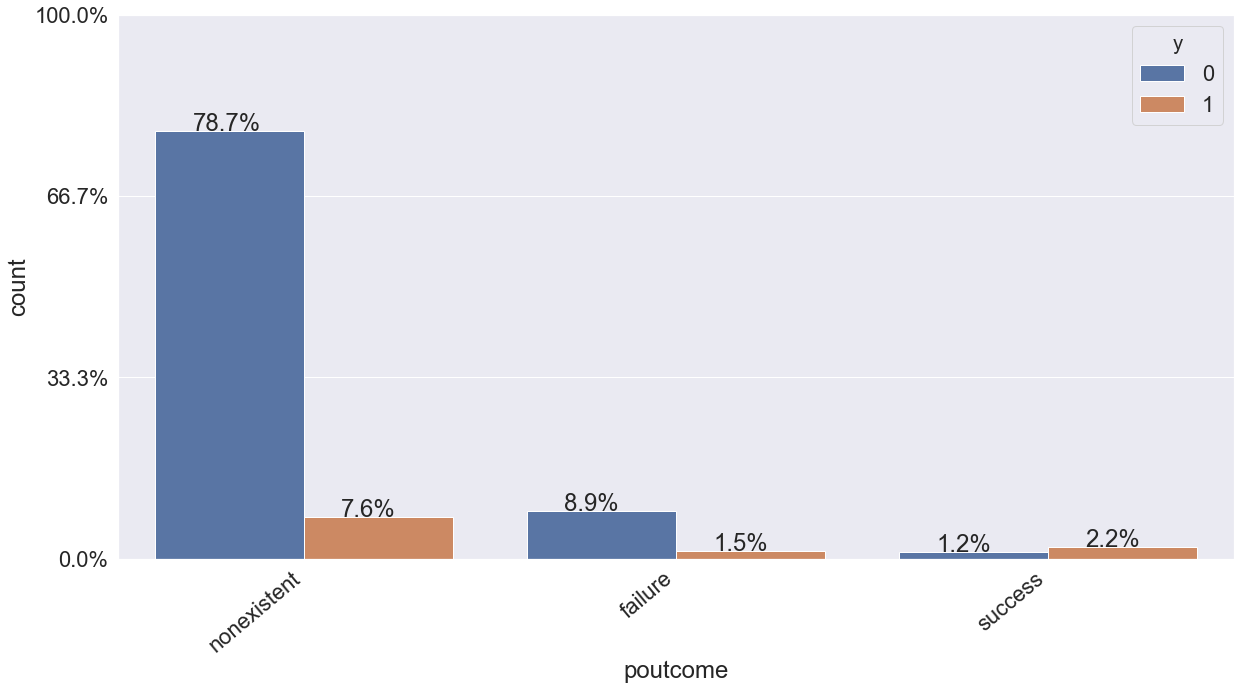

In [18]:
sns.set(font_scale=2)

def countplot_withY(label, dataset):
    
  plt.figure(figsize=(20,10))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 4 ticks (therefore 3 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 4))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

for i in x_features:
    if raw_data[i].dtype == 'object':
        countplot_withY(i,raw_data)

## Continous variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


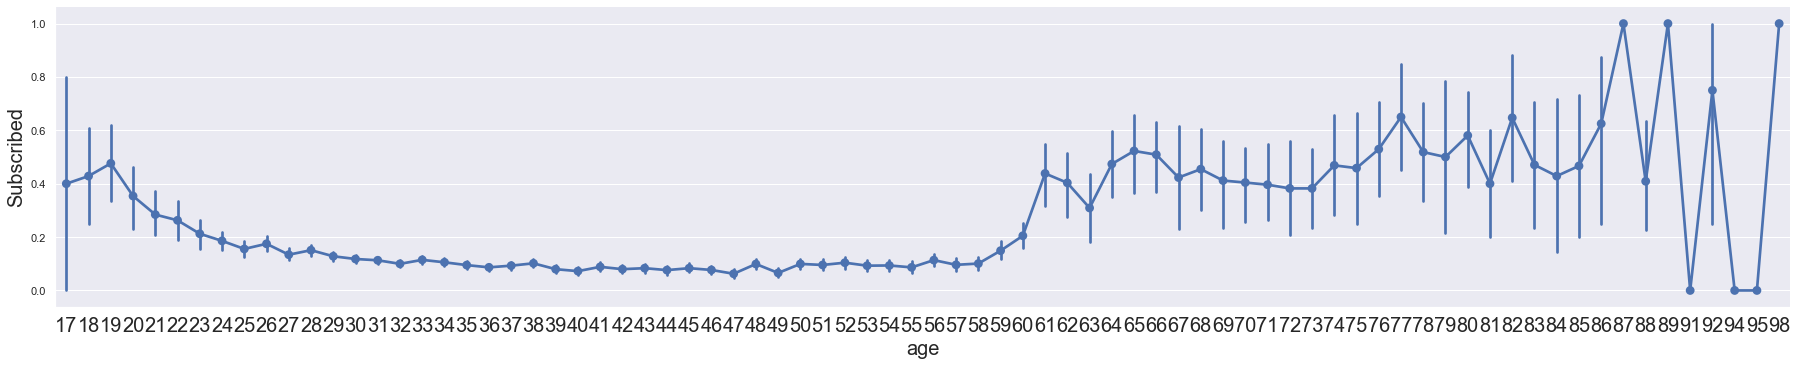

<Figure size 1440x1008 with 0 Axes>

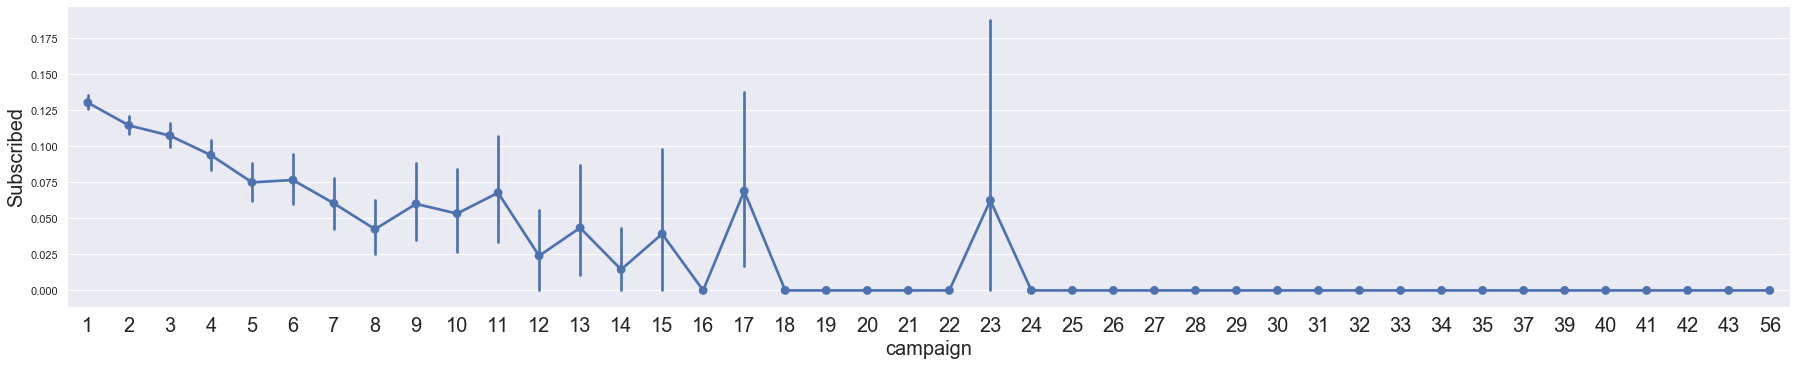

<Figure size 1440x1008 with 0 Axes>

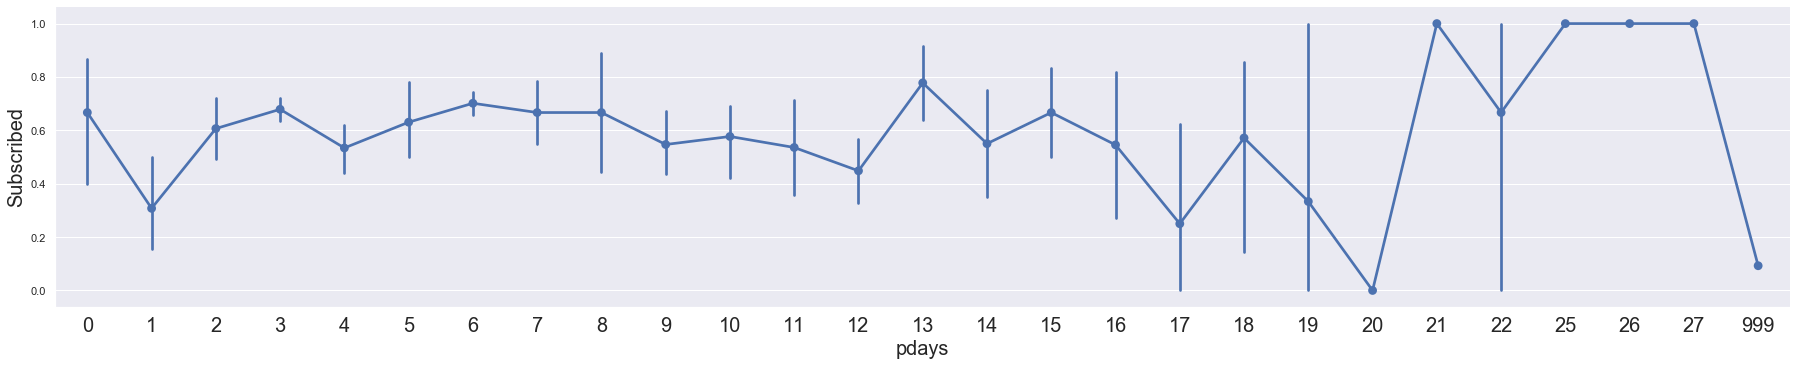

<Figure size 1440x1008 with 0 Axes>

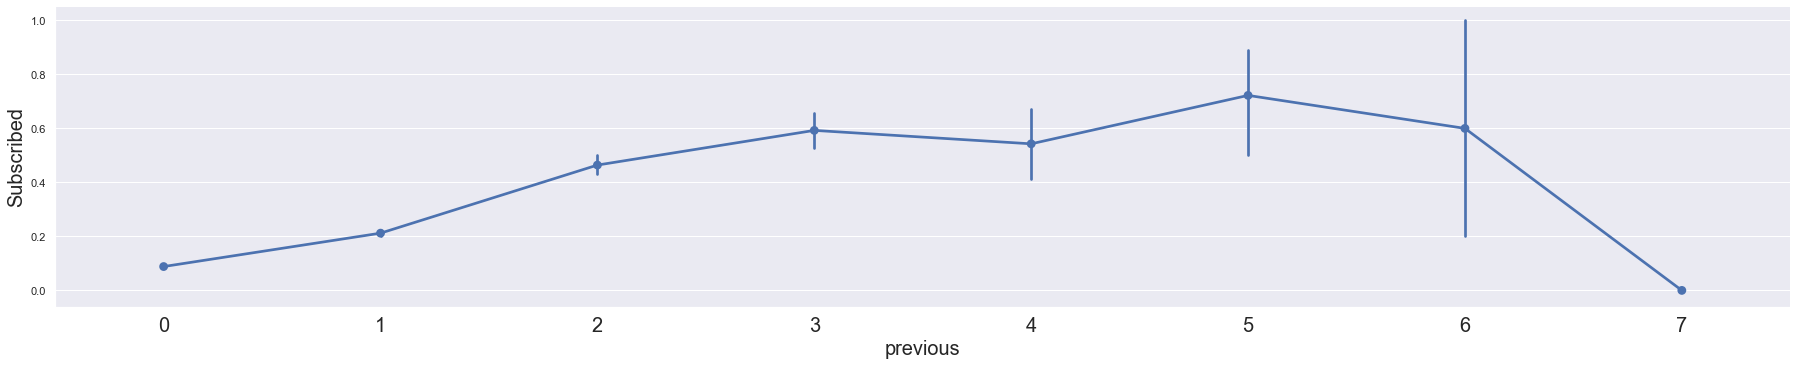

<Figure size 1440x1008 with 0 Axes>

In [19]:
#excluding duration

sns.set(style="darkgrid")

for i in raw_data.drop(['duration','y'], axis=1).copy().columns: #didnt want to look at duration with this type of plot
    if (raw_data[i].dtype == 'int64'):
        sns.factorplot(i,'y', data=raw_data, aspect = 5)
        plt.xlabel(i, fontsize = 20)
        plt.xticks(fontsize=20)
        plt.ylabel('Subscribed', fontsize = 20)
        plt.figure()

#age (numeric)       
        
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#pdays: number of days that passed by after the client was last contacted from a previous campaign
#(numeric; 999 means client was not previously contacted)

#previous: number of contacts performed before this campaign and for this client (numeric)
        

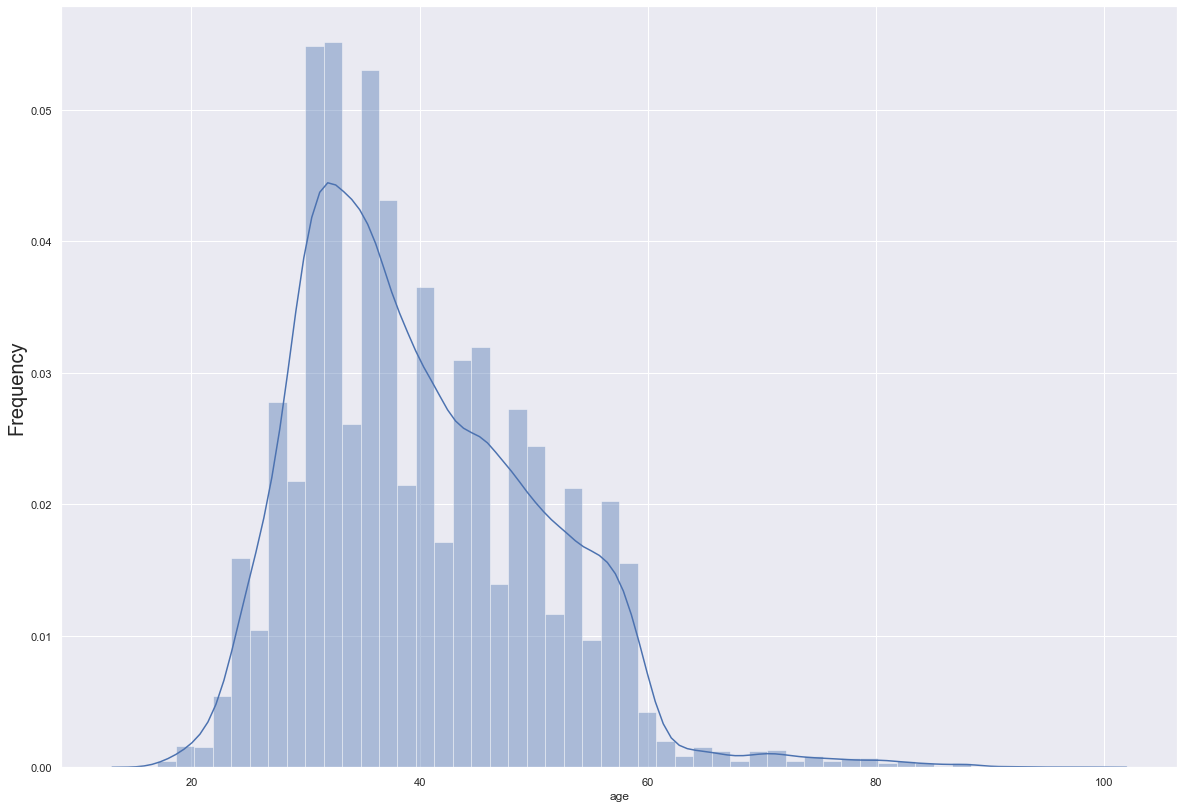

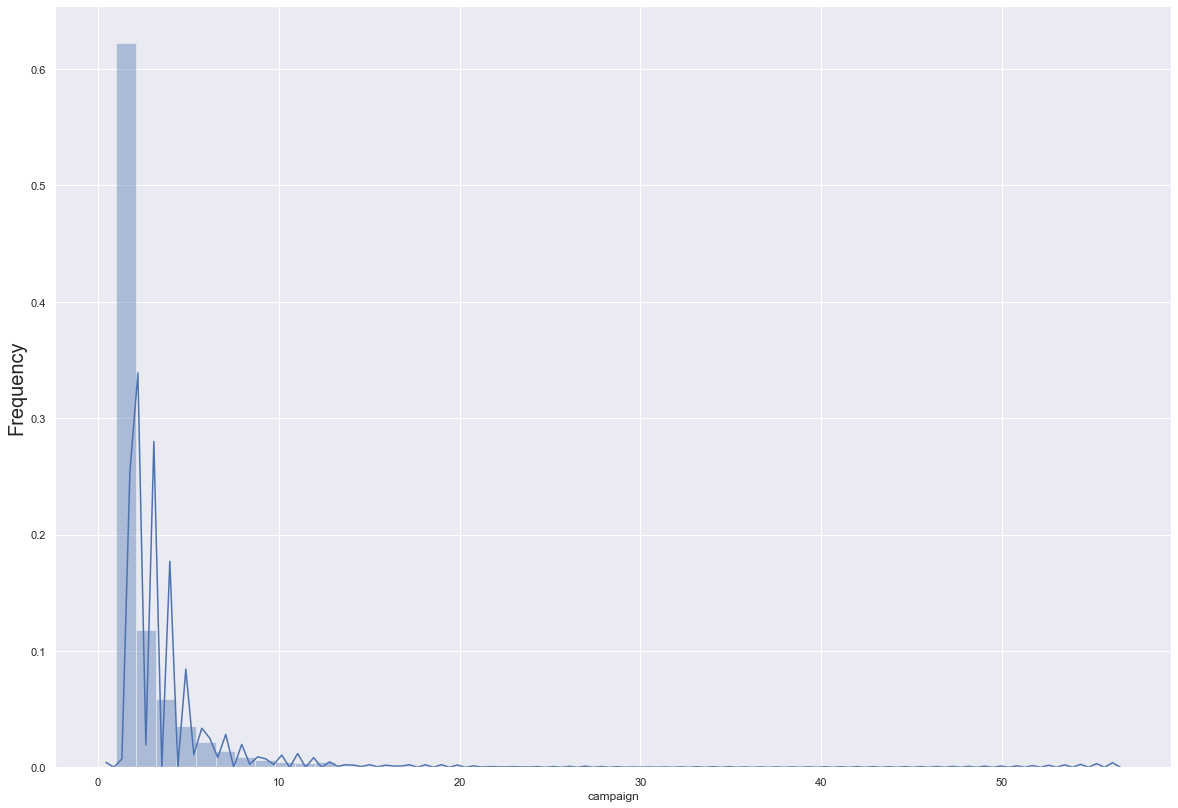

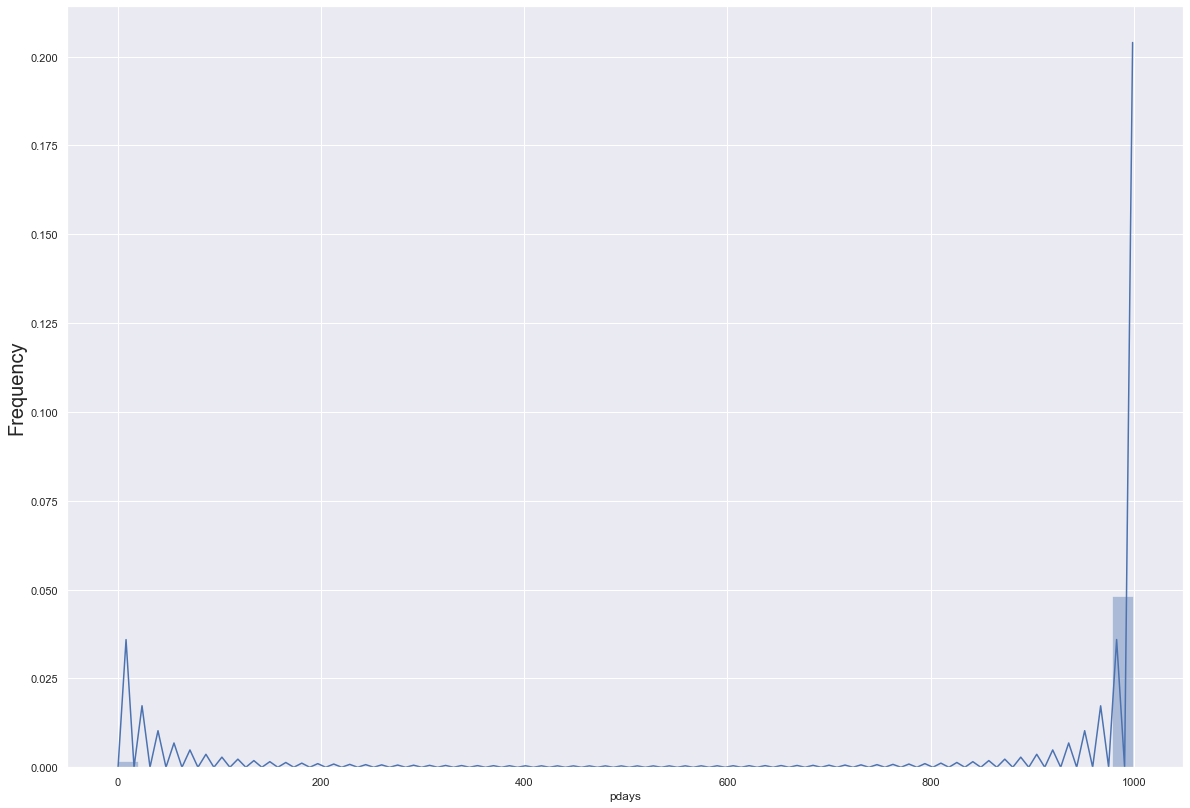

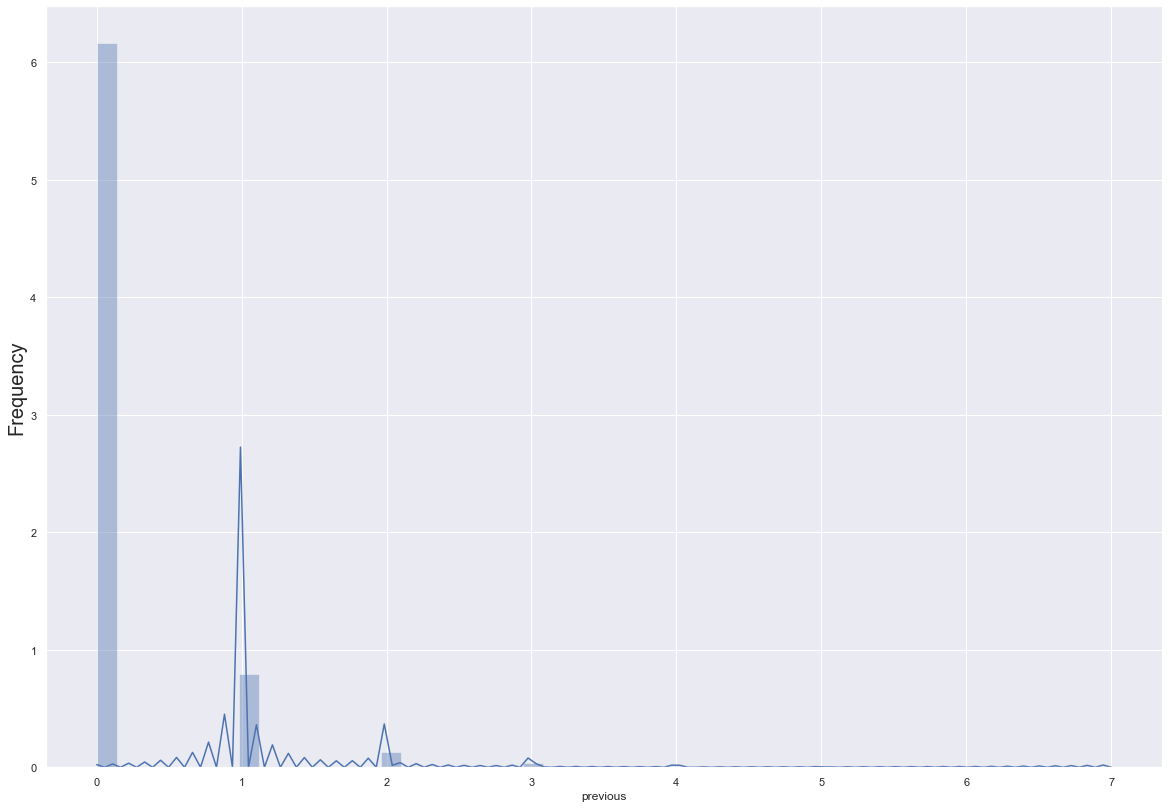

<Figure size 1440x1008 with 0 Axes>

In [20]:
#Continous variable distributions:

for i in raw_data.drop(['duration','y'], axis=1).copy().columns: #didnt want to look at duration with this type of plot
    if (raw_data[i].dtype == 'int64'):
        sns.distplot(raw_data[i])
        plt.ylabel('Frequency', fontsize = 20)
        plt.figure()

## Correlation heatmap

In [21]:
#Encoding Raw Data categorical columns to look at correlation heatmap

def encoding_categories_correlation(actual):
    new = actual.copy()
    
    for i in actual.columns:
        if new[i].dtype == 'object':
             new[i] = new[i].astype('category')
             new[i] = new[i].cat.codes
    
        #elif raw_data[i].dtype == 'float64':
            #new = new.drop([i], axis=1)
    
    new = new.drop(['duration','y'], axis=1)
    new.insert(0,'y',raw_data['y'],True)
    
    return new

encoded_data=encoding_categories_correlation(raw_data)
encoded_data.head()


#duration: last contact duration, in seconds (numeric).
#Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
#Yet, the duration is not known before a call is performed.
#Also, after the end of the call y is obviously known.
#Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,0,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,0,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,0,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,0,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


Text(0.5, 1.05, 'Pearson Correlation of Features')

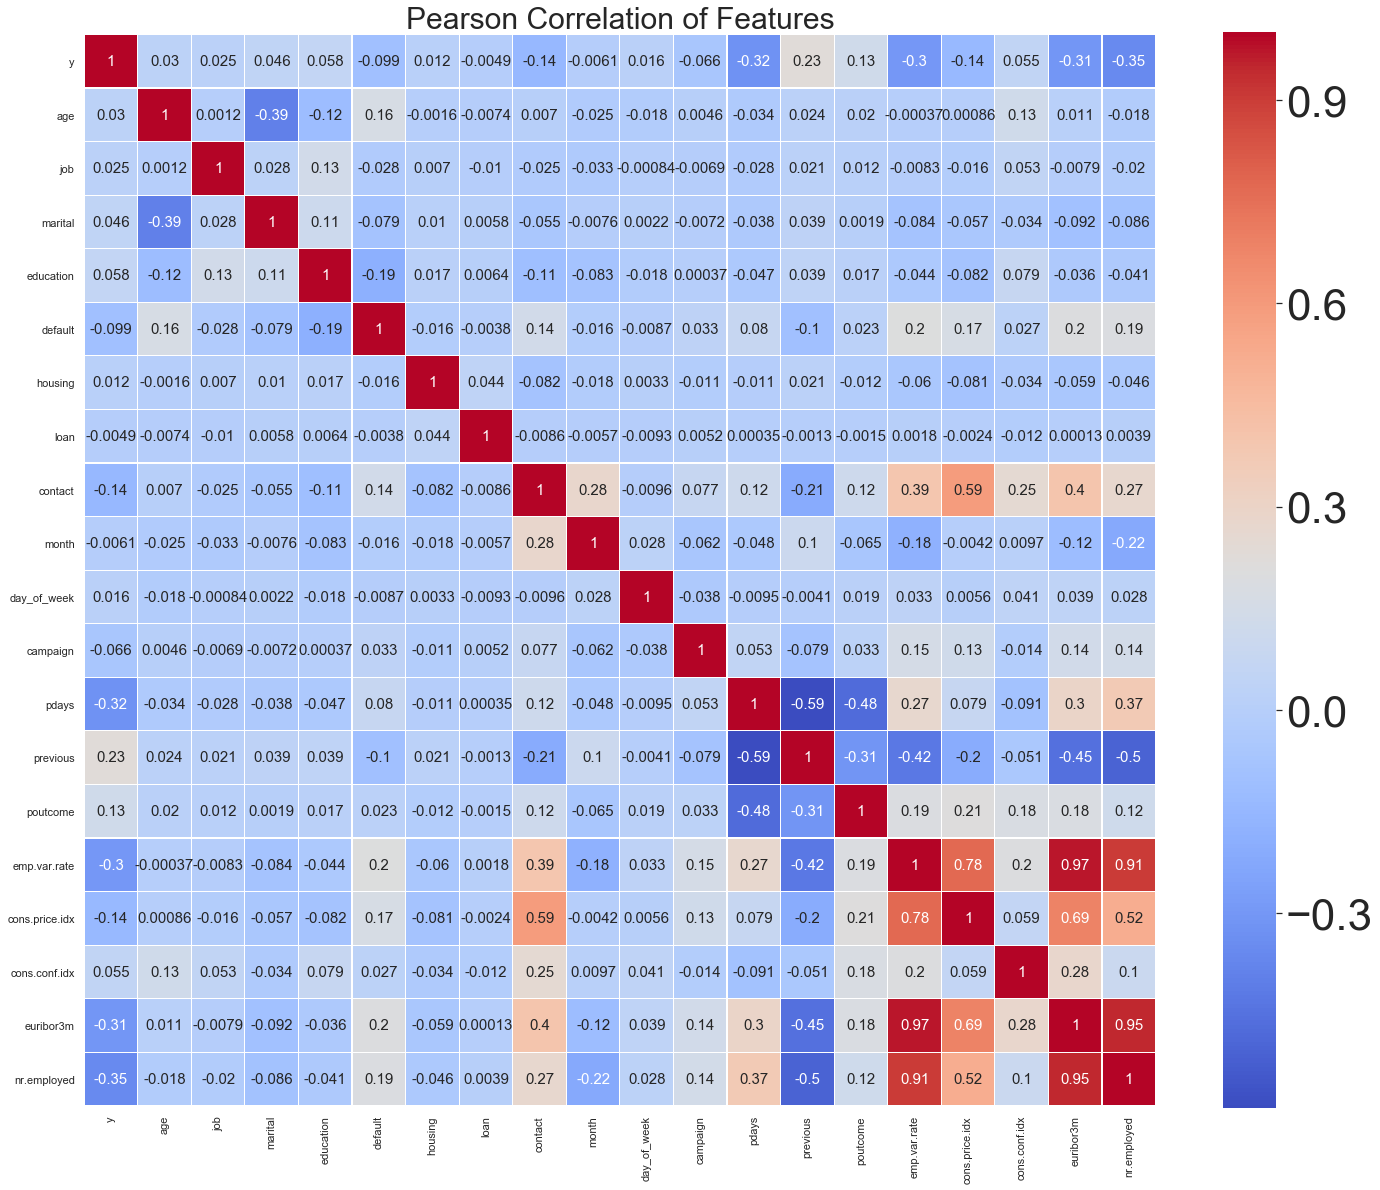

In [22]:
plt.subplots(figsize =(24, 22))
sns.set(font_scale=4)
sns.heatmap(
        encoded_data.corr(), 
        cmap = "coolwarm",
        square=True, 
        cbar_kws={'shrink':.9 },
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':15 })
plt.title('Pearson Correlation of Features', y=1.05, size=30)

#dark red = strong positive corelation (as x goes up, y goes up)
#dark blue = strong negative correlation (as x goes up, y goes down)

In [23]:
#Correlation Observations:

#we see an extremly high postive corelation (0.95) betweem the euribor 3 month rate (euribor3m), 
#and the number of employees (nr.employed)
#similar conclusion with the emp.var rate and the euribor3m

#make the arugment to drop nr.employed and  emp.var rate

In [24]:
#in the midsdt of a bunch of uncorrelated data, we see contact and consumer price index are decenly correlated...

## Social and economic context attribute analysis

In [25]:
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric)
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)

raw_data.describe(include=['float64']) 

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


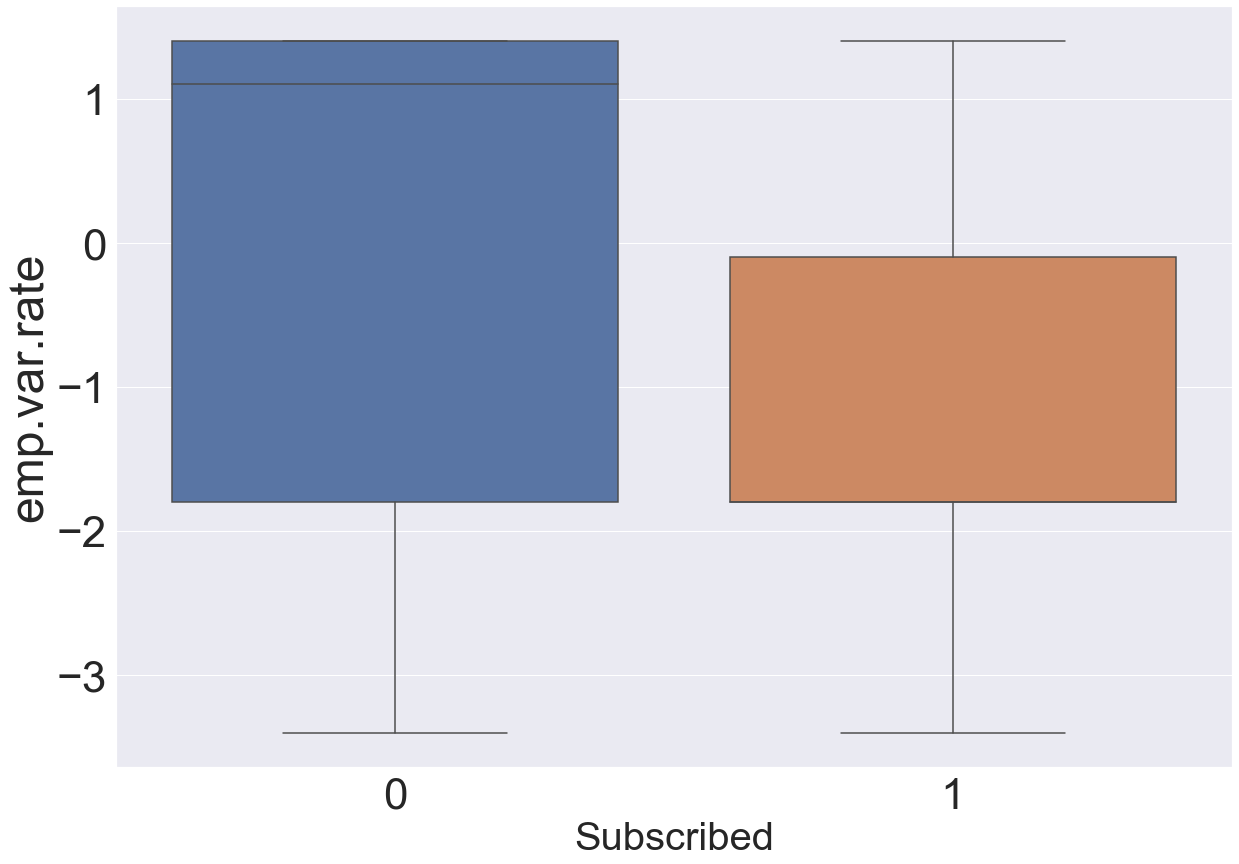

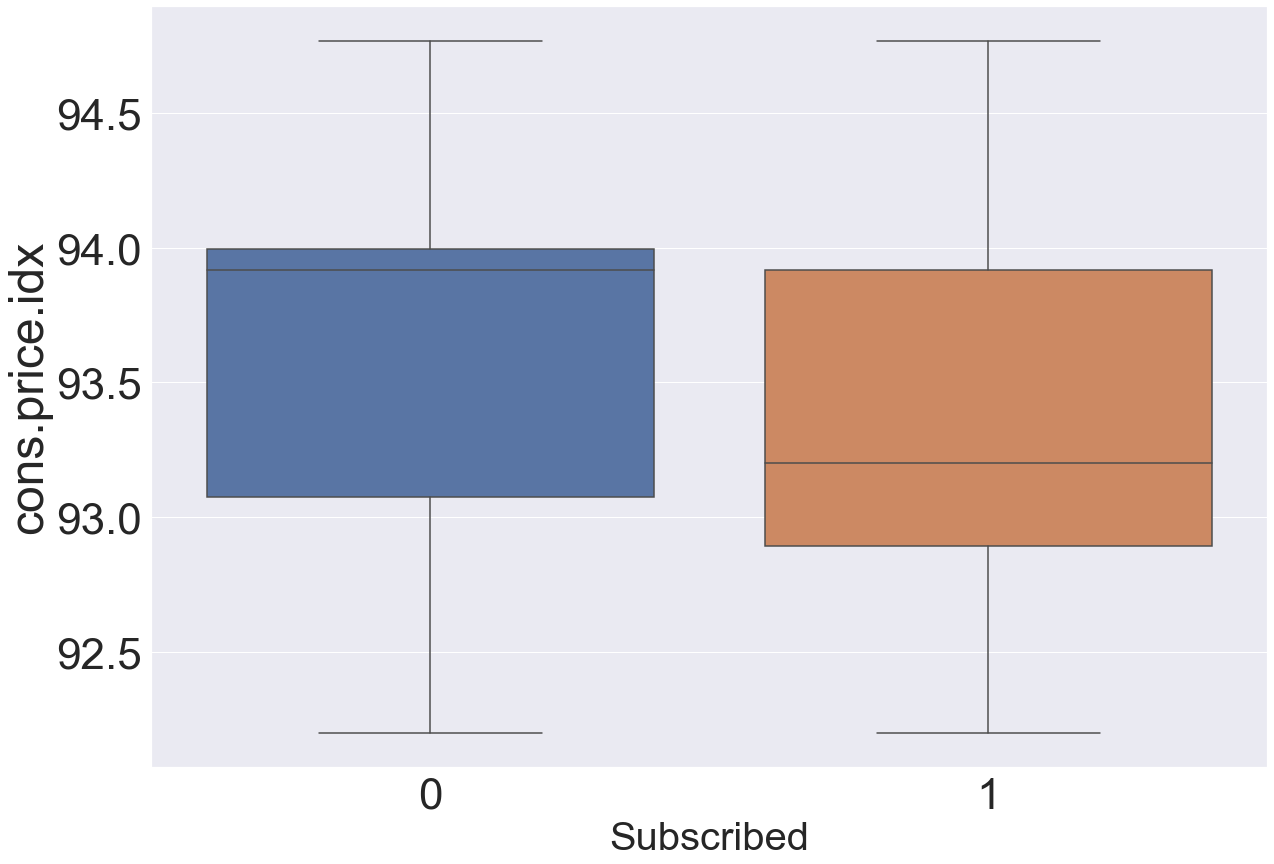

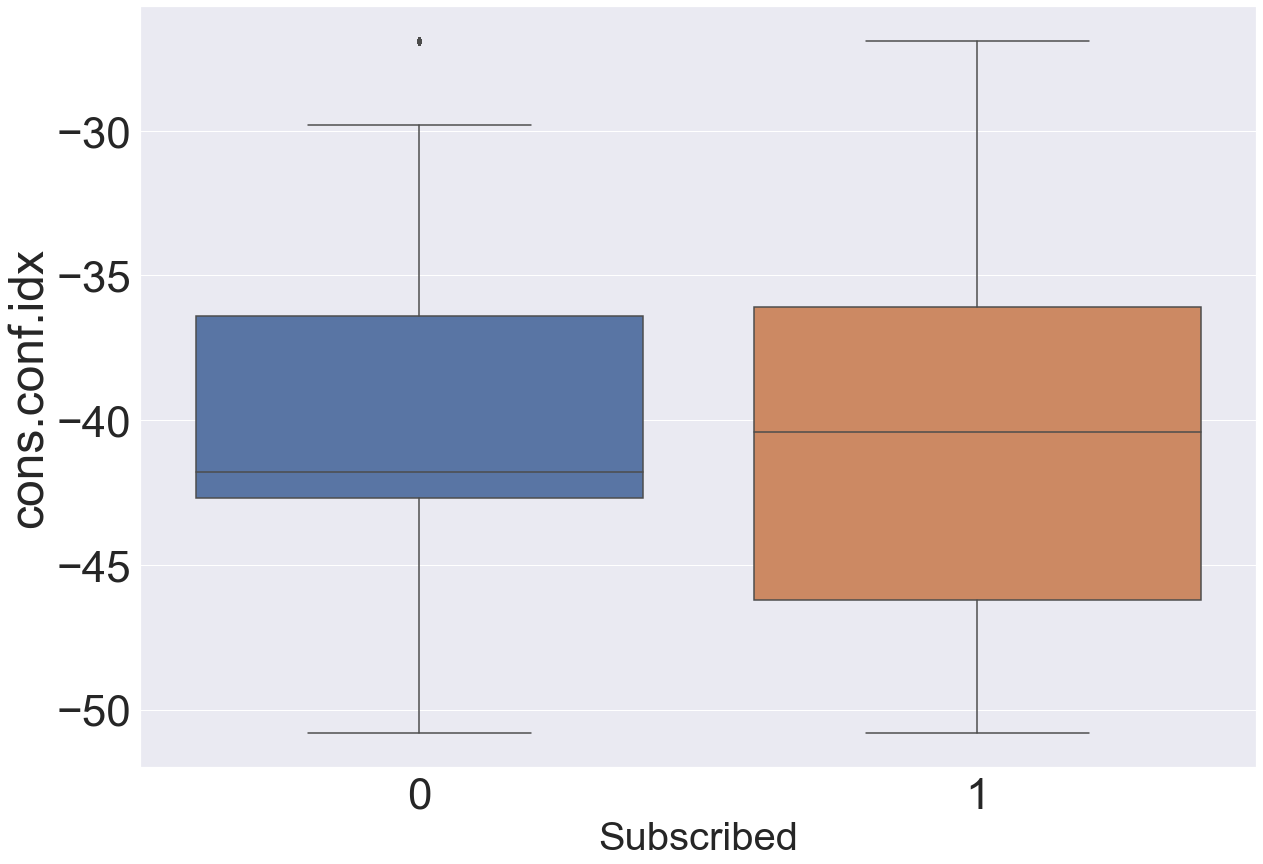

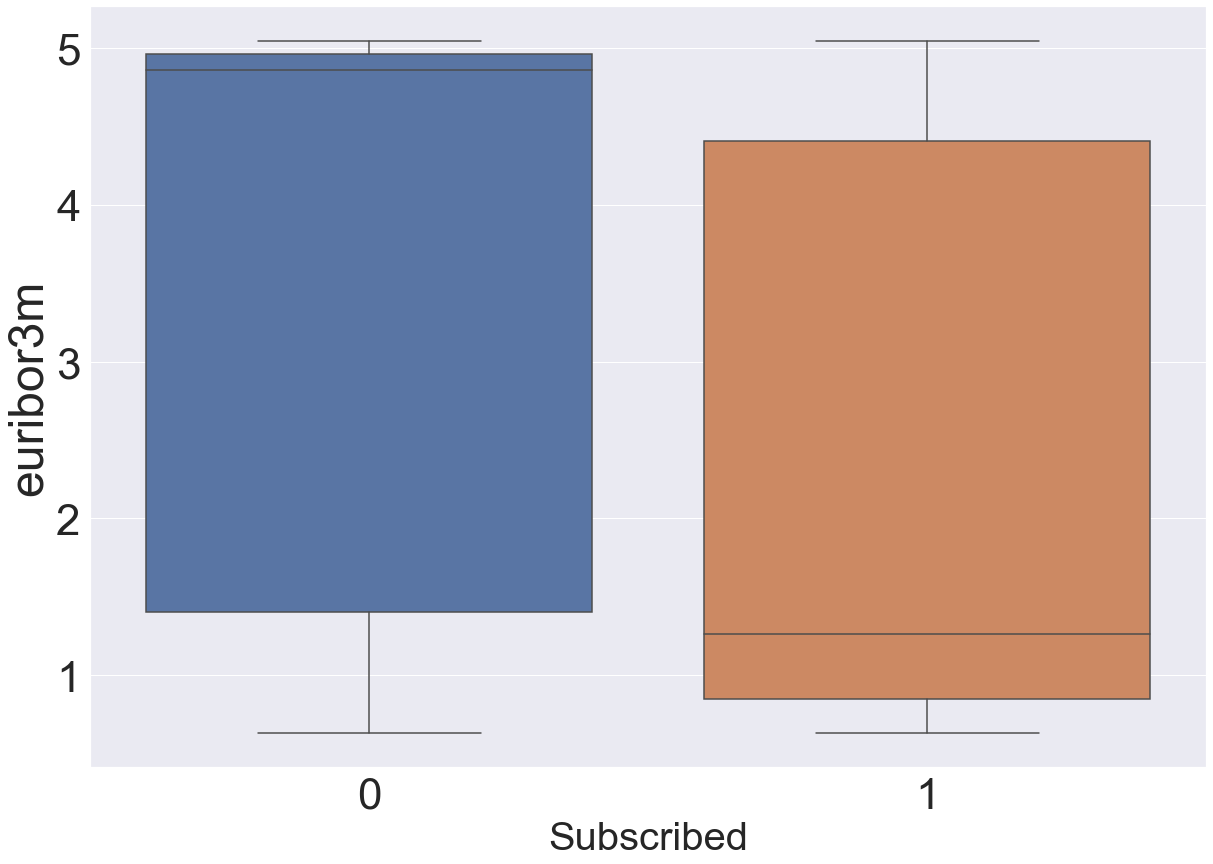

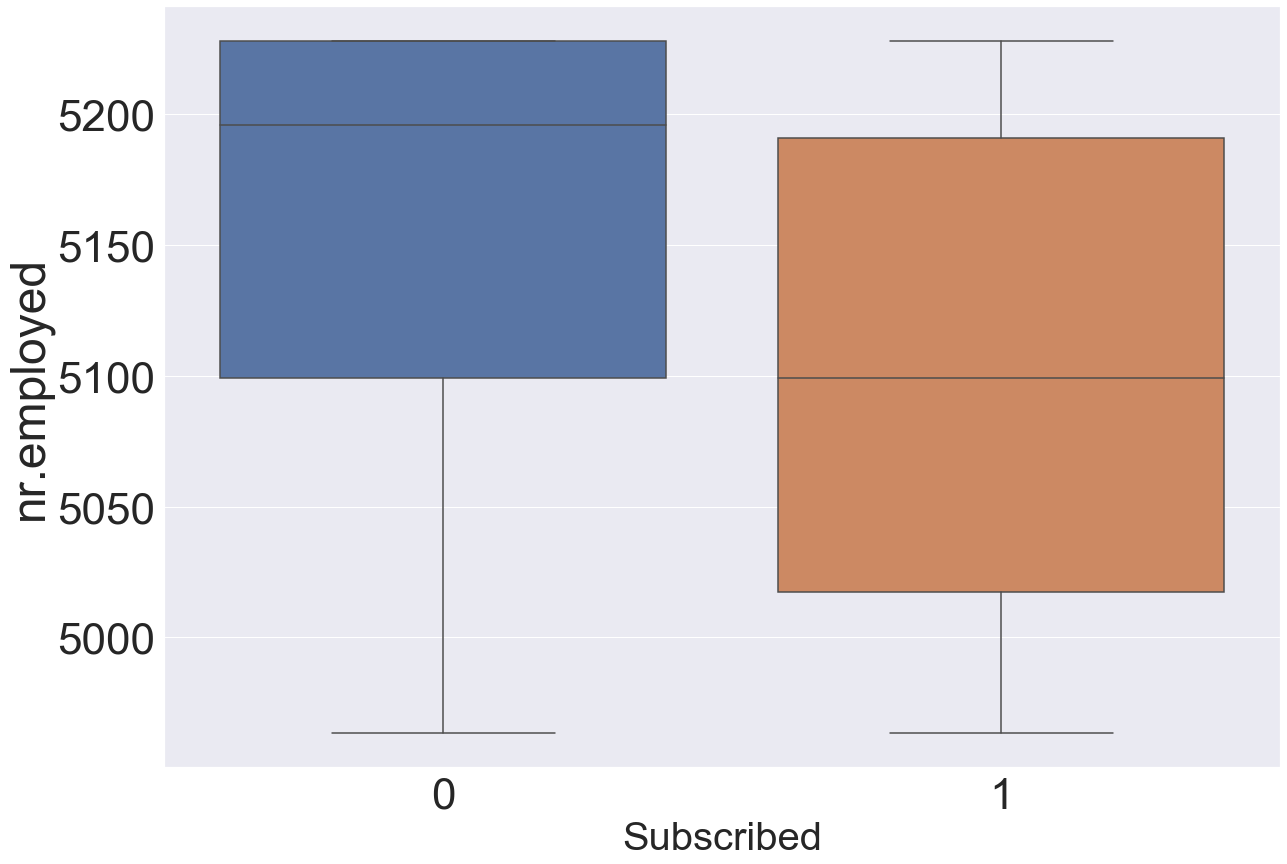

<Figure size 1440x1008 with 0 Axes>

In [26]:
for i in raw_data.drop(['duration','y'], axis=1).copy().columns: #didnt want to look at duration
    if (raw_data[i].dtype == 'float64'):
        sns.boxplot(x="y", y=i, data=raw_data)
        plt.xlabel('Subscribed', fontsize = 40)
        plt.figure()

<Figure size 1440x1008 with 0 Axes>

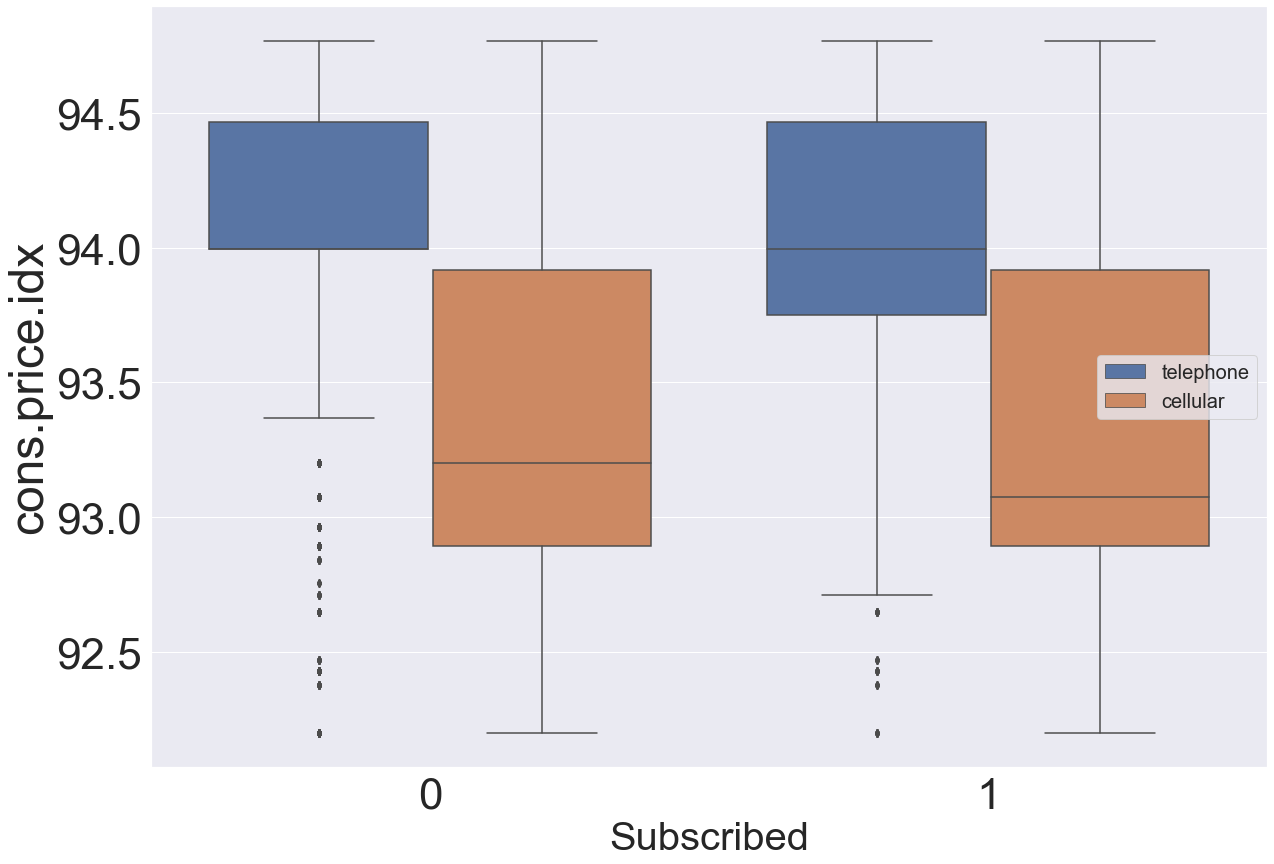

<Figure size 1440x1008 with 0 Axes>

In [27]:
#contact and consumer price index are showing high postive correlalation, so I wanted to explore that

axes=sns.boxplot(x="y", y='cons.price.idx', data=raw_data, hue='contact')
axes.legend(fontsize=20)
plt.xlabel('Subscribed', fontsize = 40)
plt.figure()

## Data Cleaning and Feature Engineering

In [28]:
(raw_data[raw_data.duplicated(keep=False)]) #keep=flase shows both first and last occourances of duplicates

#since there are 24 rows, we know there are 12 rows of data that are duplicated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


In [29]:
clean_data_initial=raw_data.drop_duplicates(inplace=False,keep='first')
#Verify dropping worked:
print(clean_data_initial.shape)
print(raw_data.shape)

(41176, 21)
(41188, 21)


In [30]:
#pdays/previous- i think we should remove 999(client wasnt previously contacted),
#no way to encode this for use and it doesnt follow trend
#also perhaps remove 20 as well, why is that showing exactly 0 for corelation??
#this is essentially the same as a 0 data point in the "previous" column... meaning client was not contacted before campagin
#OR! perhaps we change this to include the outlier of 999, but feature engineer it


#Option 2: Remove pdays column completely, keep previous pdays column, engineer new column (contacted or not) 

pdays:

In [31]:
clean_data_pdays_999=clean_data_initial[clean_data_initial["pdays"] == 999] 
clean_data_pdays_999.shape
#would have to remove 39661 rows of data... cant do this, must remove column

(39661, 21)

In [32]:
#Testing pdays=999 and previous=0:

clean_data_contacted_test=clean_data_initial.copy()

#0=Not previously contact (False), 1= previosuly contacted (True)
previously_contacted_series=(clean_data_contacted_test['previous']!=0)|(clean_data_contacted_test['pdays']!=999)
clean_data_contacted_test['prev_contacted']=previously_contacted_series

clean_data_contacted_test[clean_data_contacted_test['prev_contacted']==True].head()

#this is showing that pdays=999 and previous=0 does not mean the same thing...

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prev_contacted
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,0,True
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,1,True
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,0,True
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,1,True
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,0,True


poutcome:

In [33]:
clean_data_poutcome_nononexistant=clean_data_initial[clean_data_initial["poutcome"] == "nonexistent"]
(clean_data_poutcome_nononexistant.shape[0]/clean_data_initial.shape[0])*100
#86% of the data is "nonexistent"... making only 17% useful
#an argument can definitly be made to remove this column completely

#this means that there wernt that many clients contacted in P1, most have been contacted in P2
#is is why we see such a high number of clients with 0 for previous, meaning no contacts before P2

86.33912959005245

<Figure size 1440x1008 with 0 Axes>

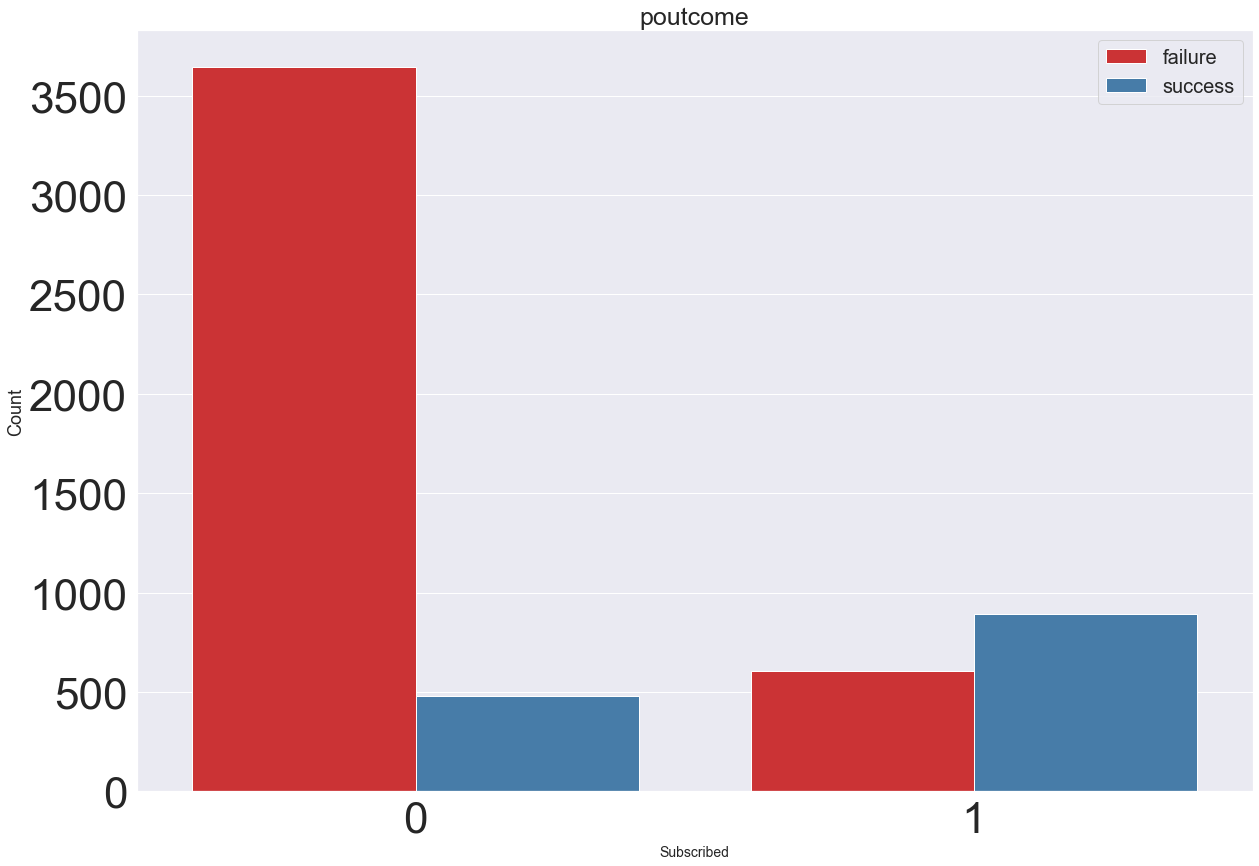

<Figure size 1440x1008 with 0 Axes>

In [34]:
#this is the useful outcome data:

axes=sns.countplot( x='y', data=clean_data_initial[clean_data_initial["poutcome"] != "nonexistent"], hue='poutcome', palette="Set1")
plt.title('poutcome',fontsize=25)
axes.legend(fontsize=20)
plt.xlabel('Subscribed', fontsize = 14)
plt.ylabel('Count', fontsize = 18)
plt.figure()

campagin:

<Figure size 1440x1008 with 0 Axes>

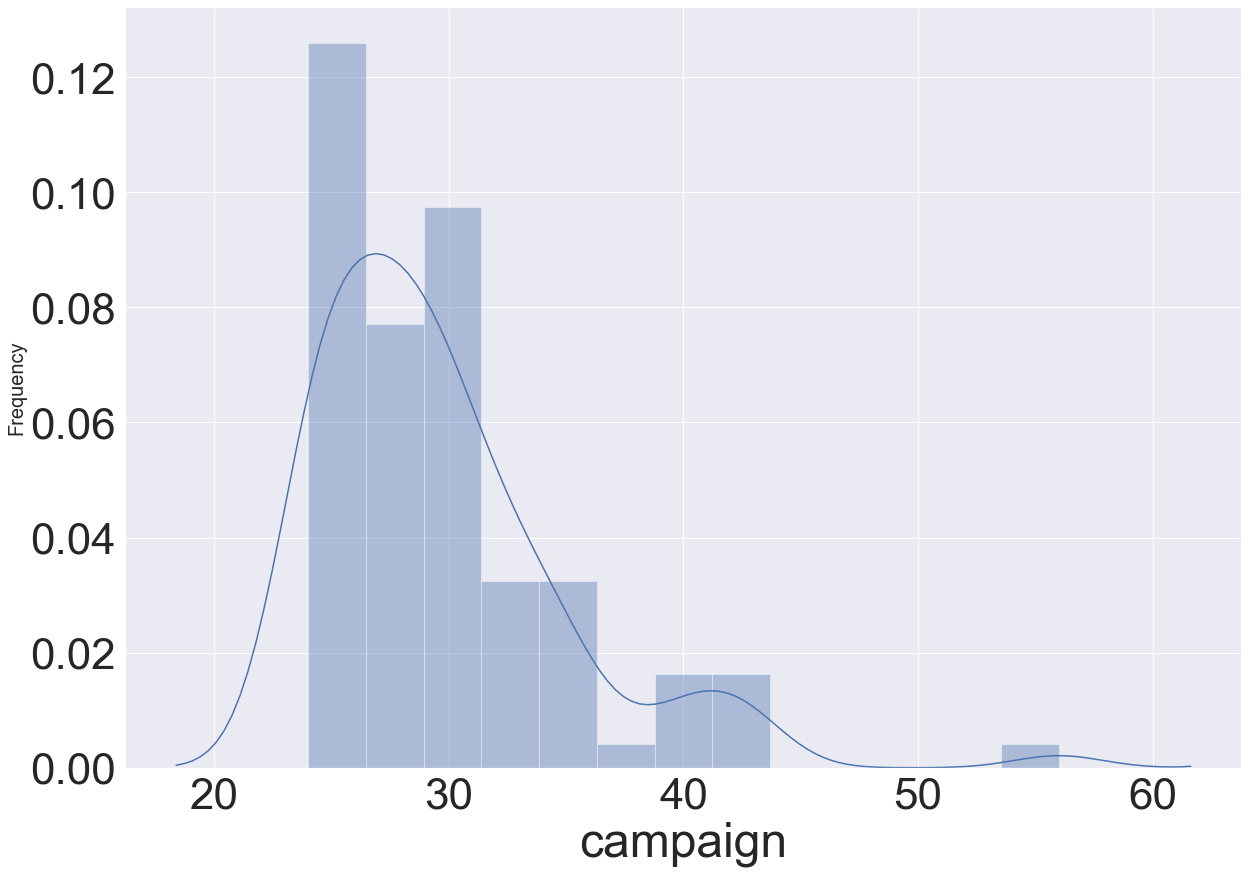

<Figure size 1440x1008 with 0 Axes>

In [35]:
#all data past 43 is assumed to be 56... which is why there is no data between 43-53.

clean_data_campaign_23=clean_data_initial[clean_data_initial["campaign"] >23] 

sns.distplot(clean_data_campaign_23["campaign"])
plt.ylabel('Frequency', fontsize = 20)
plt.figure()

In [36]:
#we can see there is only 1 data point at 56, but we dont know if it was 44, 48,49, or 56
#so since its just 1 row, we delete this row

clean_data_campaign=clean_data_initial[clean_data_initial["campaign"] == 56] 
clean_data_campaign.shape

(1, 21)

In [37]:
#not too much data past 23, in which the correlation is 100% 0s....

clean_data_campaign_23.shape

(100, 21)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1008 with 0 Axes>

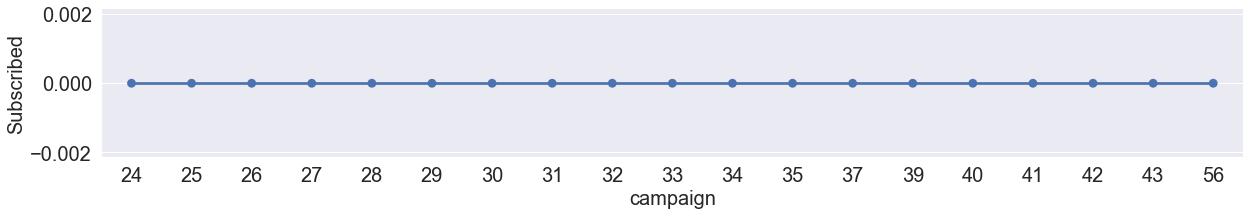

<Figure size 1440x1008 with 0 Axes>

In [38]:
sns.factorplot('campaign','y', data=clean_data_campaign_23, aspect = 4)
plt.xlabel('campaign', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Subscribed', fontsize = 20)
plt.figure()

Cleaning/Engineering Functions:

In [39]:
#SUBSET CLEAN: 

def feature_cleaning_engineering_subset(actual):
    new = actual.copy()
    
    #0=Not previously contact (False), 1= previosuly contacted (True)
    new['prev_contacted']=(new['pdays']!=999)

    #drop pdays now that we have prev_contacted
    new = new.drop(['pdays'], axis=1)
    
    #drop duration
    new = new.drop(['duration'], axis=1)
    
    #drop poutcome 
    new = new.drop(['poutcome'], axis=1)
    
    #drop emp.var.rate 
    new = new.drop(['emp.var.rate'], axis=1)
    #drop nr.employed 
    new = new.drop(['nr.employed'], axis=1)
     
    #drop campagin=56 data point
    new=new[new["campaign"] != 56]
    
    #drop unknown rows where small %
    new=new[new["marital"] != 'unknown']
    new=new[new["education"] != 'unknown']
    
    return new

clean_data_sub=feature_cleaning_engineering_subset(clean_data_initial)
clean_data_sub.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y,prev_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,93.994,-36.4,4.857,0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,93.994,-36.4,4.857,0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,93.994,-36.4,4.857,0,False


In [40]:
#ALL CLEAN: 

def feature_cleaning_engineering_all(actual):
    new = actual.copy()
    
    #0=Not previously contact (False), 1= previosuly contacted (True)
    new['prev_contacted']=(new['pdays']!=999)
    
    #drop duration
    new = new.drop(['duration'], axis=1)
    
    #drop campagin=56 data point
    new=new[new["campaign"] != 56]
    
    #drop unknown rows where small %
    new=new[new["marital"] != 'unknown']
    new=new[new["education"] != 'unknown']
    
    return new

clean_data_all=feature_cleaning_engineering_all(clean_data_initial)
clean_data_all.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prev_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,False


In [41]:
#Verify clean worked:
print(clean_data_sub.shape)
print(raw_data.shape)

(39374, 17)
(41188, 21)


<Figure size 1440x1008 with 0 Axes>

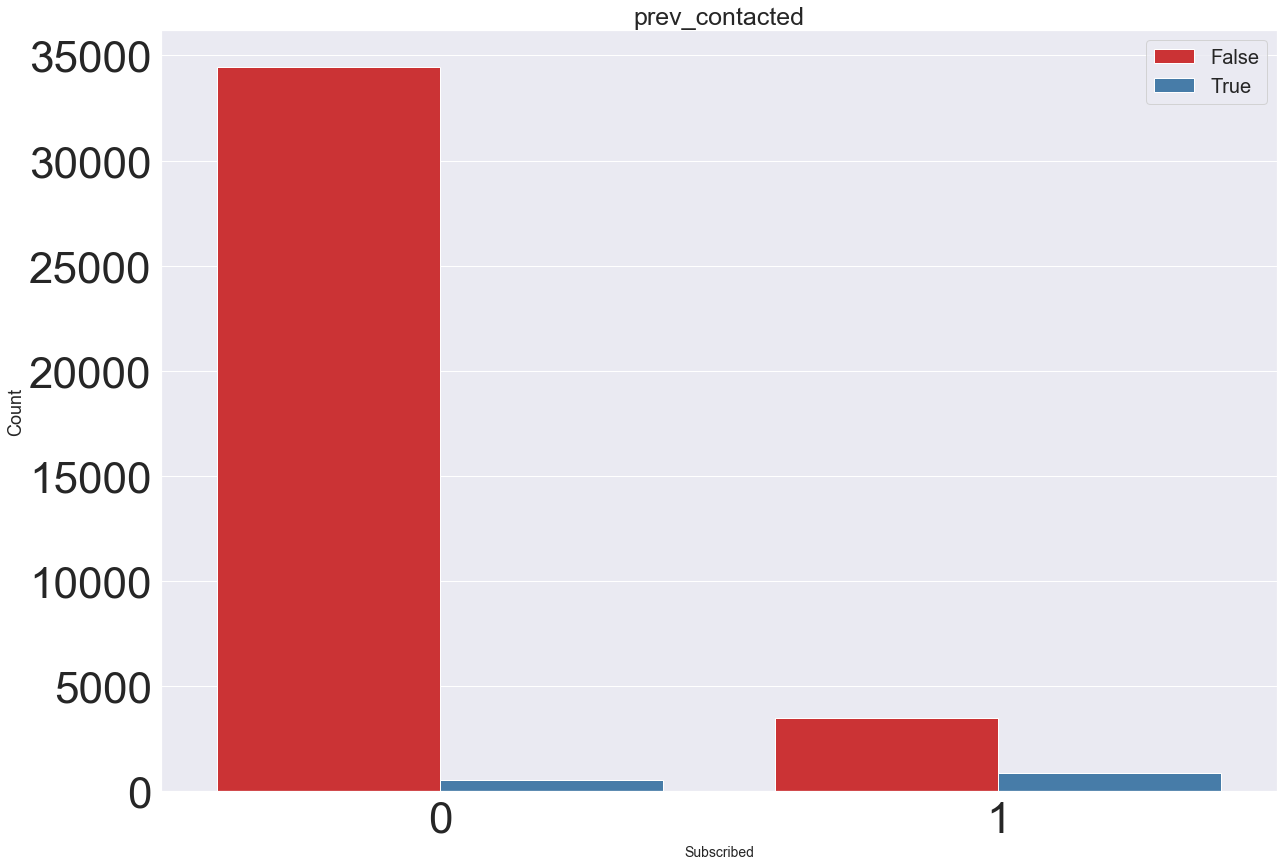

<Figure size 1440x1008 with 0 Axes>

In [42]:
#See what prev_contacted looks like:
axes=sns.countplot( x='y', data=clean_data_sub, hue='prev_contacted', palette="Set1")
plt.title('prev_contacted',fontsize=25)
axes.legend(fontsize=20)
plt.xlabel('Subscribed', fontsize = 14)
plt.ylabel('Count', fontsize = 18)
plt.figure()

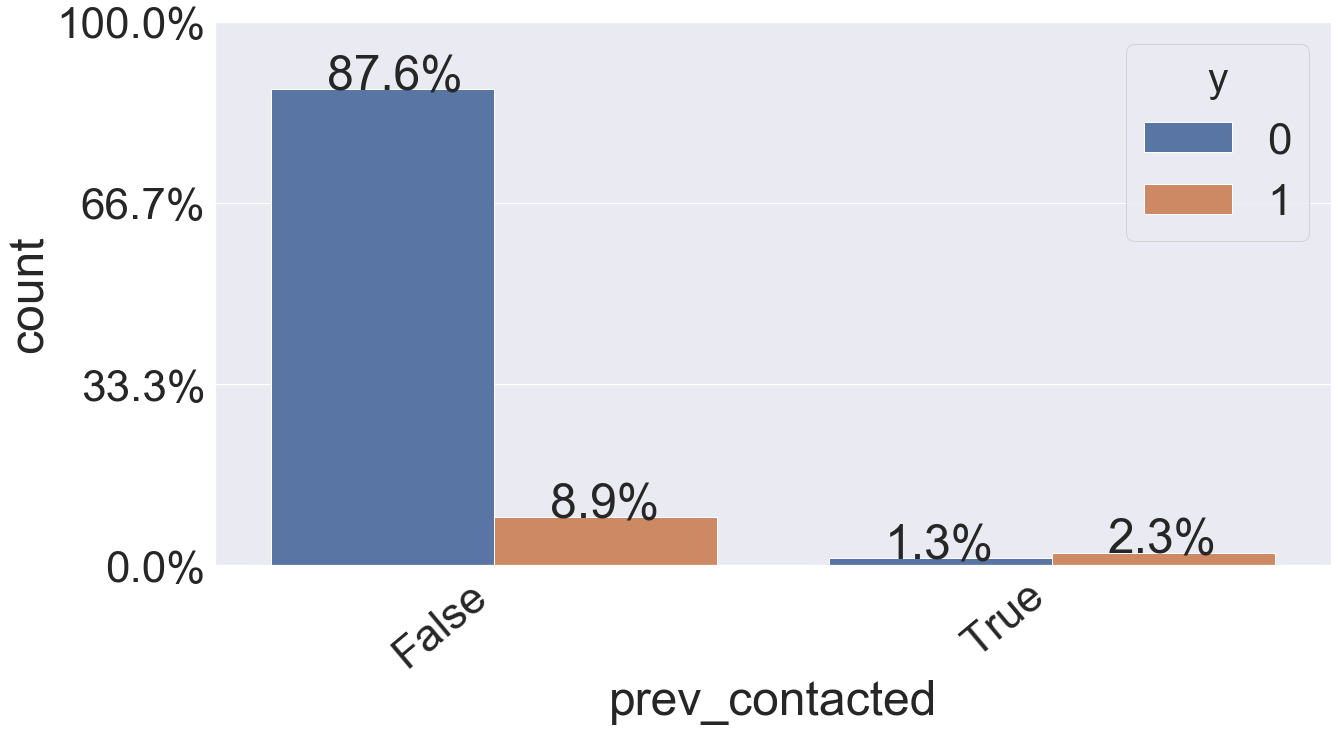

In [43]:
countplot_withY('prev_contacted',clean_data_sub)

## Client Profile

Typical Client that says "No" to product (0):

In [44]:
#Wasnt previously contacted (from prev_contacted)
#Failure in poutcome
#Younger in age
#Were contacted a lot by the marketing team (from campaign)
#Didnt default on any loans nor have any loans
#Born in the month of may
#University degree or highschool education 
#Married

Typical Client that says "Yes" to product (1):

In [45]:
#Older in age
#University degree education
#Student
#Maried 
#Didnt default on any loans nor have any loans
#Contacted via their cellphone

## Encoding Categorial Data

In [46]:
clean_data_sub.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                   int64
prev_contacted       bool
dtype: object

In [47]:
#One-Hot encoding Subset Features

def one_hot_encoding_categories_subset(actual):
    new = actual.copy()
    
    job = pd.get_dummies(new.job, drop_first=True)
    marital = pd.get_dummies(new.marital, drop_first=True)
    education = pd.get_dummies(new.education, drop_first=True, prefix='education')
    default= pd.get_dummies(new.default, drop_first=True, prefix='default')
    housing= pd.get_dummies(new.housing, drop_first=True, prefix='house')
    loan= pd.get_dummies(new.loan, drop_first=True, prefix='loan')
    month = pd.get_dummies(new.month, drop_first=True)
    day_of_week = pd.get_dummies(new.day_of_week, drop_first=True)
    
    # Concat the dummy columns to the dataframe
    new = pd.concat([new, job, marital , education, housing, default, loan, month ,day_of_week], axis=1)
    
    new = new.drop(['y'], axis=1)
    new.insert(0,'y',raw_data['y'],True)
    
    # droping oringal values we one hot as we have concatenated the dummies in our original dataframe
    new.drop(['job', 'marital' , 'education', 'housing', 'default', 'loan','month' ,'day_of_week'], axis = 1, inplace = True)

    #encode the other features not one hoted:
    new['contact'] = new['contact'].astype('category')
    new['contact'] = new['contact'].cat.codes
    
    new['prev_contacted'] = new['prev_contacted'].astype('category')
    new['prev_contacted'] = new['prev_contacted'].cat.codes
    
    return new

onehot_encoded_subset=one_hot_encoding_categories_subset(clean_data_sub)
onehot_encoded_subset.head()

,y,age,contact,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,prev_contacted,blue-collar,...,jun,mar,may,nov,oct,sep,mon,thu,tue,wed
0,0,56,1,1,0,93.994,-36.4,4.857,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,57,1,1,0,93.994,-36.4,4.857,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,37,1,1,0,93.994,-36.4,4.857,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,40,1,1,0,93.994,-36.4,4.857,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,56,1,1,0,93.994,-36.4,4.857,0,0,...,0,0,1,0,0,0,1,0,0,0


In [48]:
#One-Hot encoding All Features

def one_hot_encoding_categories_all(actual):
    new = actual.copy()
    
    job = pd.get_dummies(new.job, drop_first=True)
    marital = pd.get_dummies(new.marital, drop_first=True)
    education = pd.get_dummies(new.education, drop_first=True, prefix='education')
    default= pd.get_dummies(new.default, drop_first=True, prefix='default')
    housing= pd.get_dummies(new.housing, drop_first=True, prefix='house')
    loan= pd.get_dummies(new.loan, drop_first=True, prefix='loan')
    month = pd.get_dummies(new.month, drop_first=True)
    day_of_week = pd.get_dummies(new.day_of_week, drop_first=True)
    poutcome = pd.get_dummies(new.poutcome, drop_first=True, prefix='poutcome')
    
    # Concat the dummy columns to the dataframe
    new = pd.concat([new, job, marital , education, default, housing, loan,month ,day_of_week,poutcome], axis=1)
    
    new = new.drop(['y'], axis=1)
    new.insert(0,'y',raw_data['y'],True)
    
    
    # droping oringal values we one hot as we have concatenated the dummies in our original dataframe
    new.drop(['job', 'marital' , 'education', 'default', 'housing', 'loan','month' ,'day_of_week','poutcome'], axis = 1, inplace = True)

    #encode the other features not one hoted:
    new['contact'] = new['contact'].astype('category')
    new['contact'] = new['contact'].cat.codes
    
    new['prev_contacted'] = new['prev_contacted'].astype('category')
    new['prev_contacted'] = new['prev_contacted'].cat.codes
    
    return new

onehot_encoded_all=one_hot_encoding_categories_all(clean_data_all)
onehot_encoded_all.head()

,y,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,may,nov,oct,sep,mon,thu,tue,wed,poutcome_nonexistent,poutcome_success
0,0,56,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,0,57,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
2,0,37,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
3,0,40,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
4,0,56,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0


## Adressing Inbalanced Dataset

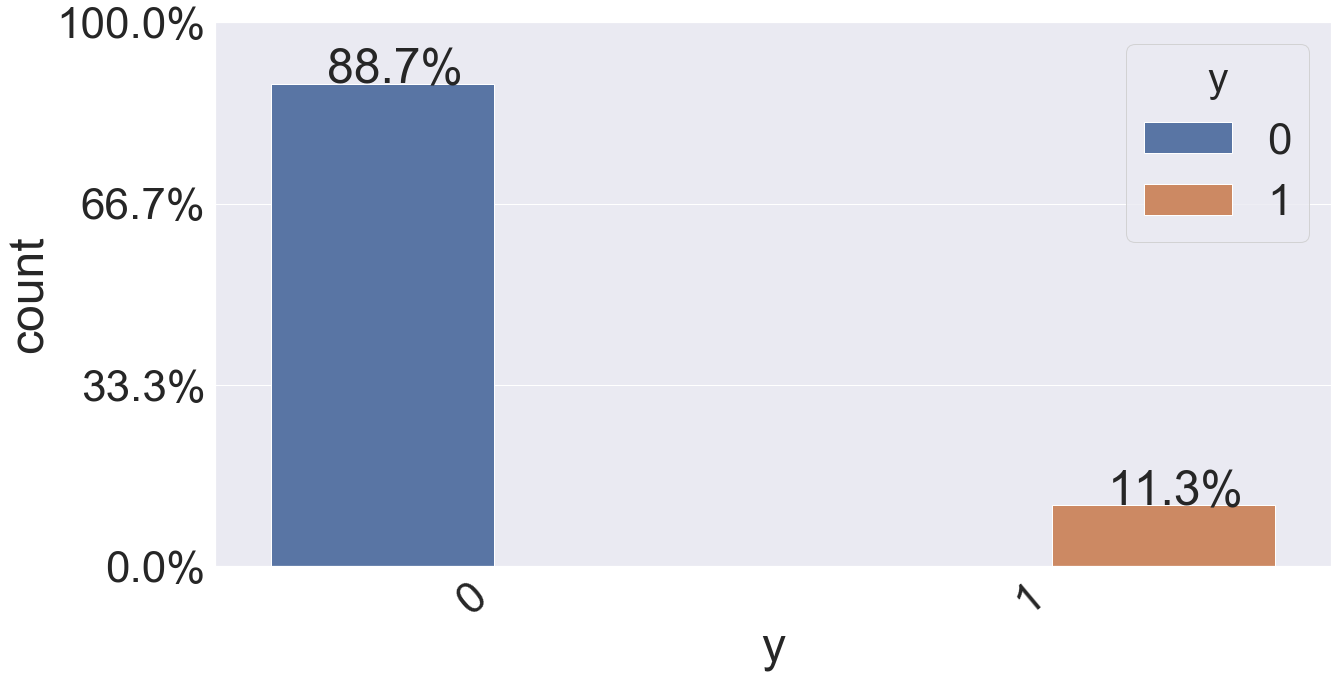

In [49]:
countplot_withY("y",raw_data)

In [50]:
from collections import Counter
Counter(clean_data_sub['y'])

Counter({0: 34996, 1: 4378})

Random Under Sampling 

In [51]:
from imblearn.under_sampling import RandomUnderSampler 

def undersampling(actual):
    
    new=actual.copy()
    
    rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')
    X_rus, y_rus = rus.fit_resample(new.drop(['y'], axis=1), new['y'])
    new_1=pd.concat([X_rus, y_rus],axis=1)
    print('Resampled clean_data_sub shape %s' % Counter(y_rus))
    print('Resample data size: ', new_1.shape)
    
    return new_1
    
onehot_encoded_subset_rus=undersampling(onehot_encoded_subset)    

Resampled clean_data_sub shape Counter({0: 4378, 1: 4378})
Resample data size:  (8756, 47)


In [52]:
onehot_encoded_all_rus=undersampling(onehot_encoded_all) 

Resampled clean_data_sub shape Counter({0: 4378, 1: 4378})
Resample data size:  (8756, 52)


In [53]:
onehot_encoded_all_rus.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,nov,oct,sep,mon,thu,tue,wed,poutcome_nonexistent,poutcome_success,y
0,46,1,9,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,1,0,0,1,0,0
1,58,0,3,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,0,1,0,0,1,0,0
2,37,0,1,999,0,-2.9,92.201,-31.4,0.883,5076.2,...,0,0,0,0,1,0,0,1,0,0
3,60,0,11,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,0,0,1,0,0
4,54,0,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
#This code was previsouly used to create a new unbalanced dataset with SMOTE.
#This workflow will train and test the data on syntehitic data, leading to leakage
#and thus doesnt work with the rus and raw unbalanced dataset that utilize Cv
#smote dataset is dicussed and defined futher down

from imblearn.over_sampling import SMOTE

def smote_oversample(actual):
    
    new=actual.copy()
    
    oversample = SMOTE(random_state=42)
    X_smot, y_smot = oversample.fit_resample(new.drop(['y'], axis=1), new['y'])
    new_1=pd.concat([X_smot, y_smot],axis=1)
    print('Resampled clean_data_sub shape %s' % Counter(y_smot))
    print('Resample data size: ', new_1.shape)
    
    return new_1
    
onehot_encoded_subset_smot=smote_oversample(onehot_encoded_subset)
onehot_encoded_all_smot=smote_oversample(onehot_encoded_all) 

## X and y for All and Subset

In [58]:
def X_y(actual):
    
    new=actual.copy()
    y_new=new['y']
    X_new= new.drop(['y'], axis=1)
    x_features_new =X_new.columns

    return y_new,X_new,x_features_new
    
y_sub,X_sub,x_features_sub=X_y(onehot_encoded_subset)
y_all,X_all,x_features_all=X_y(onehot_encoded_all)
#
y_sub_rus,X_sub_rus,x_features_sub_rus=X_y(onehot_encoded_subset_rus)
#y_sub_smot,X_sub_smot,x_features_sub_smot=X_y(onehot_encoded_subset_smot)
#
y_all_rus,X_all_rus,x_features_all_rus=X_y(onehot_encoded_all_rus)
#y_all_smot,X_all_smot,x_features_all_smot=X_y(onehot_encoded_all_smot)

In [60]:
#Verfiy function worked: 
print(X_sub_rus.shape)
print(y_sub_rus.shape)

(8756, 46)
(8756,)


## Feature Scaling

In [61]:
#perform feature scaling on continous varibles

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler Object
scaler = MinMaxScaler()
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values

In [62]:
#Subset
feature_numerical_sub = ["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx",
                "euribor3m"]

#All
feature_numerical_all = ["age", "campaign", "previous","pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]


def feature_scale(actual,features):
    
    new=actual.copy()
    new[features]=scaler.fit_transform(new[features])
    
    return new

X_sub=feature_scale(X_sub,feature_numerical_sub)
X_all=feature_scale(X_all,feature_numerical_all)
#
X_sub_rus=feature_scale(X_sub_rus,feature_numerical_sub)
#
X_all_rus=feature_scale(X_all_rus,feature_numerical_all)

In [63]:
#Verify to see if the scaler worked:
X_sub.head()

,age,contact,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,prev_contacted,blue-collar,entrepreneur,...,jun,mar,may,nov,oct,sep,mon,thu,tue,wed
0,0.481481,1,0.0,0.0,0.698753,0.60251,0.957379,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.493827,1,0.0,0.0,0.698753,0.60251,0.957379,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0.246914,1,0.0,0.0,0.698753,0.60251,0.957379,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.283951,1,0.0,0.0,0.698753,0.60251,0.957379,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.481481,1,0.0,0.0,0.698753,0.60251,0.957379,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Ensembling and Comparing Machine Learning Algos

In [98]:
#Insert ML packages and others:

#Common Model Algorithms
from sklearn import tree, linear_model, ensemble 

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#misc libraries
import random
import time

In [99]:
#Create an empty dataframe to put MLA metrics in

MLA_columns = ['MLA Name', 'Independent Variables', 'Model Type','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'Precision Mean' ,'Recall Mean', 'F1 Score Mean']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [100]:
#Cross Validation k folds:

kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)

In [101]:
#Precesion, Recall, Fscore:

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = { 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)
            }

Without SMOTE

In [68]:
#Inital baseline models:

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

data_groups=['_Subset_Var','_All_Var','_Subset_Var_Rus','_Subset_Var_Smot','_All_Var_Rus','_All_Var_Smot']

MLA = [
        ensemble.RandomForestClassifier(),
        linear_model.LogisticRegression(solver='liblinear')
        ]

def classifer_table(X,y,features,empty_table,group):

    new=empty_table.copy()    

    # index through MLA and save performance to table

    row_index = 0 #this value will update signifying to start the row
    for alg in MLA:

        #set name and varibales
        MLA_name = alg.__class__.__name__+group
        new.loc[row_index, 'MLA Name'] = MLA_name
        
        Model_type = alg.__class__.__name__
        new.loc[row_index, 'Model Type'] = Model_type
        
        #features
        new.loc[row_index, 'Independent Variables'] = str(list(features))
    
        #score model with cross validation Kfolds, using the cv we defined earlier:
        cv_results_accuracy = model_selection.cross_validate(alg, X[features], y[:] , cv  = kfold,return_train_score=True)
        cv_results= model_selection.cross_validate(alg, X[features], y[:], cv=kfold, scoring=scoring)
        
        #then we pull the varous results and put them in our table:
        new.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results_accuracy['train_score'].mean()
        new.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results_accuracy['test_score'].mean()   
        new.loc[row_index, 'Precision Mean'] = np.mean(cv_results['test_precision'])
        new.loc[row_index, 'Recall Mean'] = np.mean(cv_results['test_recall'])
        new.loc[row_index, 'F1 Score Mean'] = np.mean(cv_results['test_f1_score'])
    
        row_index+=1
        
    return new

#Sub and All

MLA_compare_sub=classifer_table(X_sub,y_sub,x_features_sub,MLA_compare,data_groups[0])
MLA_compare_all=classifer_table(X_all,y_all,x_features_all,MLA_compare,data_groups[1])

#Sub and All Undersampleing and Smote Oversampling:

MLA_compare_sub_rus=classifer_table(X_sub_rus,y_sub_rus,x_features_sub_rus,MLA_compare,data_groups[2])
#MLA_compare_sub_smot=classifer_table(X_sub_smot,y_sub_smot,x_features_sub_smot,MLA_compare,data_groups[3])

MLA_compare_all_rus=classifer_table(X_all_rus,y_all_rus,x_features_all_rus,MLA_compare,data_groups[4])
#MLA_compare_all_smot=classifer_table(X_all_smot,y_all_smot,x_features_all_smot,MLA_compare,data_groups[5])


-------------------------


With SMOTE

In [69]:
#We will handle SMOTE differently since we cant oversample with synthetic data before we split into train and test
#Because we are using cv to evaluate our results:
#This pipeline is not a ‘Scikit-Learn’ pipeline, but ‘imblearn’ pipeline. 
#Since, SMOTE doesn’t have a ‘fit_transform’ method, we cannot use it with ‘Scikit-Learn’ pipeline.

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [109]:
def smote_oversample_classifer_table(actual,features,empty_table,group,alg):
        
        new=actual.copy()
        y_new=new['y']
        X_new= new.drop(['y'], axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=42)
                                                        
        imba_pipeline = make_pipeline(SMOTE(random_state=42),alg)

        new_table=empty_table.copy()    

        #set name and varibales
        MLA_name = alg.__class__.__name__+group
        new_table.loc[row_index, 'MLA Name'] = MLA_name
        
        Model_type = alg.__class__.__name__
        new_table.loc[row_index, 'Model Type'] = Model_type
        
        #features
        new_table.loc[row_index, 'Independent Variables'] = str(list(features))
    
        #score model with cross validation Kfolds, using the cv we defined earlier:
        cv_train_acc=cross_val_score(imba_pipeline, X_train, y_train, scoring='accuracy', cv=kfold)
        cv_test_acc=cross_val_score(imba_pipeline, X_test, y_test, scoring='accuracy', cv=kfold)
        cv_recall=cross_val_score(imba_pipeline, X_test, y_test, scoring='recall', cv=kfold)
        cv_precision=cross_val_score(imba_pipeline, X_test, y_test, scoring='precision', cv=kfold)
        cv_f1_score=cross_val_score(imba_pipeline, X_test, y_test, scoring='f1', cv=kfold)
        
        #then we pull the varous results and put them in our table:
        new_table.loc[row_index, 'MLA Train Accuracy Mean'] = np.mean(cv_train_acc)
        new_table.loc[row_index, 'MLA Test Accuracy Mean'] = np.mean(cv_test_acc)
        new_table.loc[row_index, 'Precision Mean'] = np.mean(cv_precision)
        new_table.loc[row_index, 'Recall Mean'] = np.mean(cv_recall)
        new_table.loc[row_index, 'F1 Score Mean'] = np.mean(cv_f1_score)
        
        return new_table

MLA_compare_sub_smot=pd.concat([smote_oversample_classifer_table(onehot_encoded_subset,x_features_sub,MLA_compare,data_groups[3],RandomForestClassifier()),
                               smote_oversample_classifer_table(onehot_encoded_subset,x_features_sub,MLA_compare,data_groups[3], linear_model.LogisticRegression(solver='liblinear'))])

MLA_compare_all_smot=pd.concat([smote_oversample_classifer_table(onehot_encoded_all,x_features_all,MLA_compare,data_groups[5],RandomForestClassifier()),
                               smote_oversample_classifer_table(onehot_encoded_all,x_features_all,MLA_compare,data_groups[5], linear_model.LogisticRegression(solver='liblinear'))])

In [110]:
MLA_compare_tot=pd.concat([MLA_compare_sub, MLA_compare_all,MLA_compare_sub_rus,
                           MLA_compare_sub_smot,MLA_compare_all_rus,MLA_compare_all_smot], axis=0,ignore_index=True)

In [111]:
MLA_compare_tot.sort_values(by = ['Recall Mean'], ascending = False, inplace = True)
MLA_compare_tot

,MLA Name,Independent Variables,Model Type,MLA Train Accuracy Mean,MLA Test Accuracy Mean,Precision Mean,Recall Mean,F1 Score Mean
8,RandomForestClassifier_All_Var_Rus,"['age', 'contact', 'campaign', 'pdays', 'previ...",RandomForestClassifier,0.99646,0.728756,0.761743,0.661054,0.707373
4,RandomForestClassifier_Subset_Var_Rus,"['age', 'contact', 'campaign', 'previous', 'co...",RandomForestClassifier,0.996447,0.722933,0.761953,0.65782,0.705632
9,LogisticRegression_All_Var_Rus,"['age', 'contact', 'campaign', 'pdays', 'previ...",LogisticRegression,0.733986,0.732756,0.802789,0.617834,0.697897
5,LogisticRegression_Subset_Var_Rus,"['age', 'contact', 'campaign', 'previous', 'co...",LogisticRegression,0.731004,0.729672,0.799376,0.613878,0.694129
7,LogisticRegression_Subset_Var_Smot,"['age', 'contact', 'campaign', 'previous', 'co...",LogisticRegression,0.832227,0.844154,0.30869,0.358273,0.330847
11,LogisticRegression_All_Var_Smot,"['age', 'contact', 'campaign', 'pdays', 'previ...",LogisticRegression,0.841188,0.85008,0.321918,0.35134,0.335422
10,RandomForestClassifier_All_Var_Smot,"['age', 'contact', 'campaign', 'pdays', 'previ...",RandomForestClassifier,0.878306,0.880131,0.423539,0.347683,0.379069
6,RandomForestClassifier_Subset_Var_Smot,"['age', 'contact', 'campaign', 'previous', 'co...",RandomForestClassifier,0.877834,0.877253,0.432602,0.346143,0.380215
2,RandomForestClassifier_All_Var,"['age', 'contact', 'campaign', 'pdays', 'previ...",RandomForestClassifier,0.9945,0.893712,0.54112,0.287396,0.374957
0,RandomForestClassifier_Subset_Var,"['age', 'contact', 'campaign', 'previous', 'co...",RandomForestClassifier,0.994441,0.893686,0.534883,0.281281,0.368234


Insights: 
    
1. We can see that the the random sampled data outperformes the smot and raw unbalanced dataset in Recall and F1 score
2. The Random Forest Tree models are overfit with high train accuracy scores... this will be adjusted once tunned
3. There isnt much difference between the subset and all varibables scores throughout

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

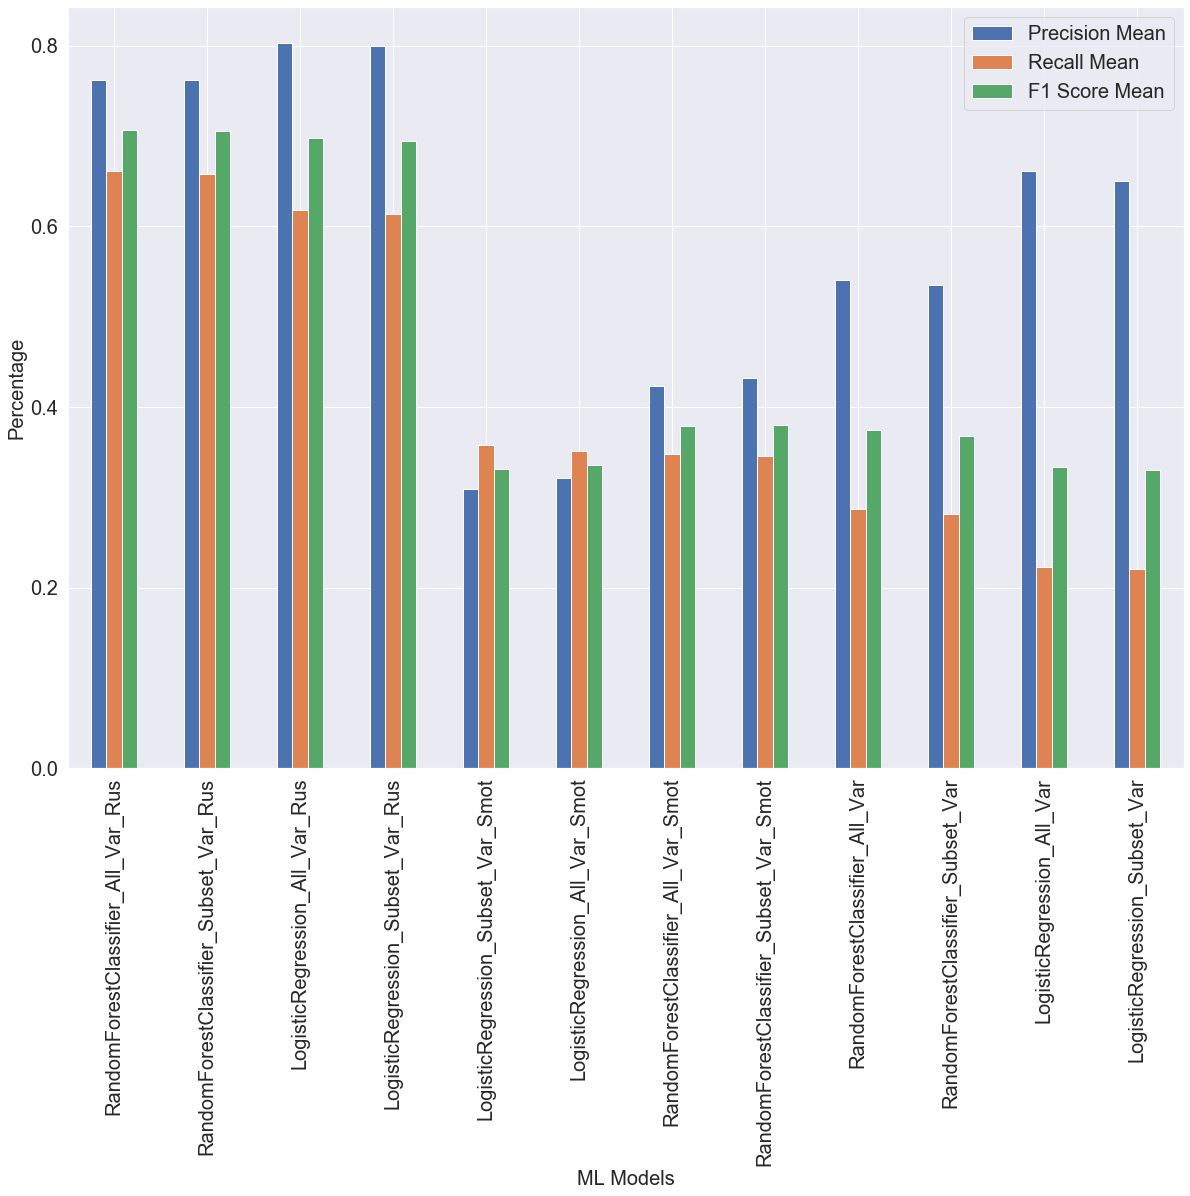

In [112]:
axes=MLA_compare_tot.plot(x="MLA Name", y=["Precision Mean", "Recall Mean", "F1 Score Mean"], kind="bar")
axes.legend(fontsize=20)
plt.xlabel('ML Models', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

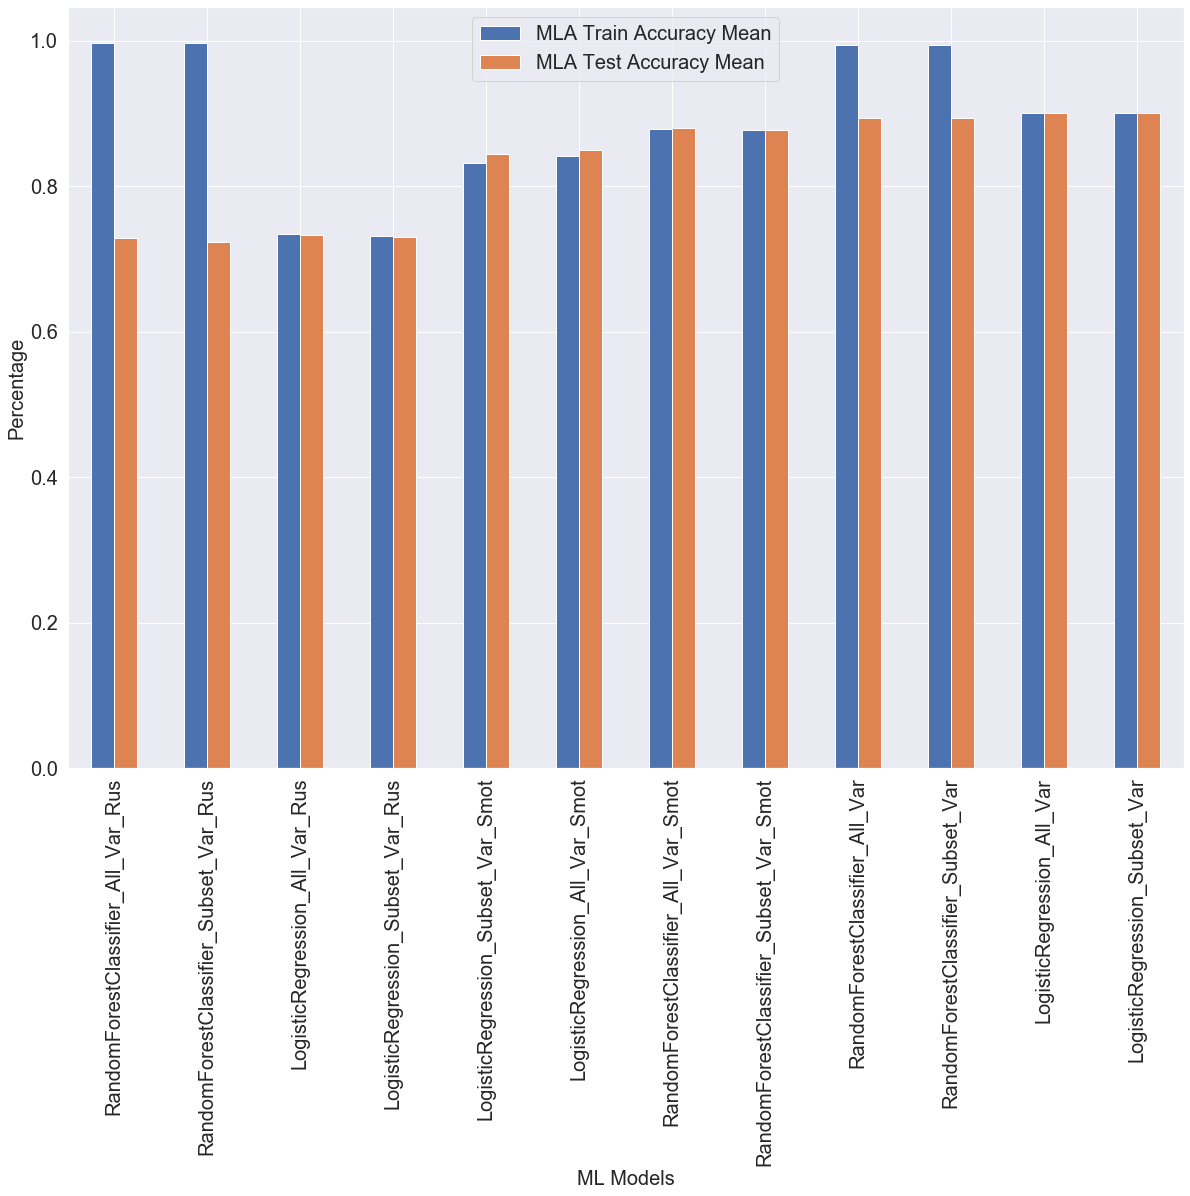

In [113]:
axes=MLA_compare_tot.plot(x="MLA Name", y=["MLA Train Accuracy Mean", "MLA Test Accuracy Mean"], kind="bar")
axes.legend(fontsize=20)
plt.xlabel('ML Models', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Random Forest Tree Feature Importance

In [119]:
def get_feature_importance(actual,features):

    new=actual.copy()
    
    from sklearn.model_selection import train_test_split

    df_train,df_test=train_test_split(new,test_size=0.33,random_state=42)
    
    y_new=df_train['y']
    X_new= df_train.drop(['y'], axis=1)
    
    #sclaer:
    X_new[features]=scaler.fit_transform(X_new[features])

    RFC_baseline=ensemble.RandomForestClassifier()
    RFC_baseline.fit(X_new,y_new)
    
    RFC_importances=RFC_baseline.feature_importances_
    
    return RFC_importances
    
RFC_importances_sub_rus=get_feature_importance(onehot_encoded_subset_rus,feature_numerical_sub)*100

In [120]:
RFC_importances_table=pd.DataFrame(RFC_importances_sub_rus.reshape(1,len(RFC_importances_sub_rus)),
                                   columns = list(x_features_sub_rus))
RFC_importances_table
RFC_importances_table.rename_axis("importance")

,age,contact,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,prev_contacted,blue-collar,entrepreneur,...,jun,mar,may,nov,oct,sep,mon,thu,tue,wed
importance,,,,,,,,,,,,,,,,,,,,,
0,14.733225,2.452063,7.710967,2.713157,5.158562,5.588634,17.379343,3.351421,1.73251,0.727134,...,0.570133,0.541276,1.407517,0.388376,0.806169,0.426594,1.904392,1.87738,1.673751,1.780894


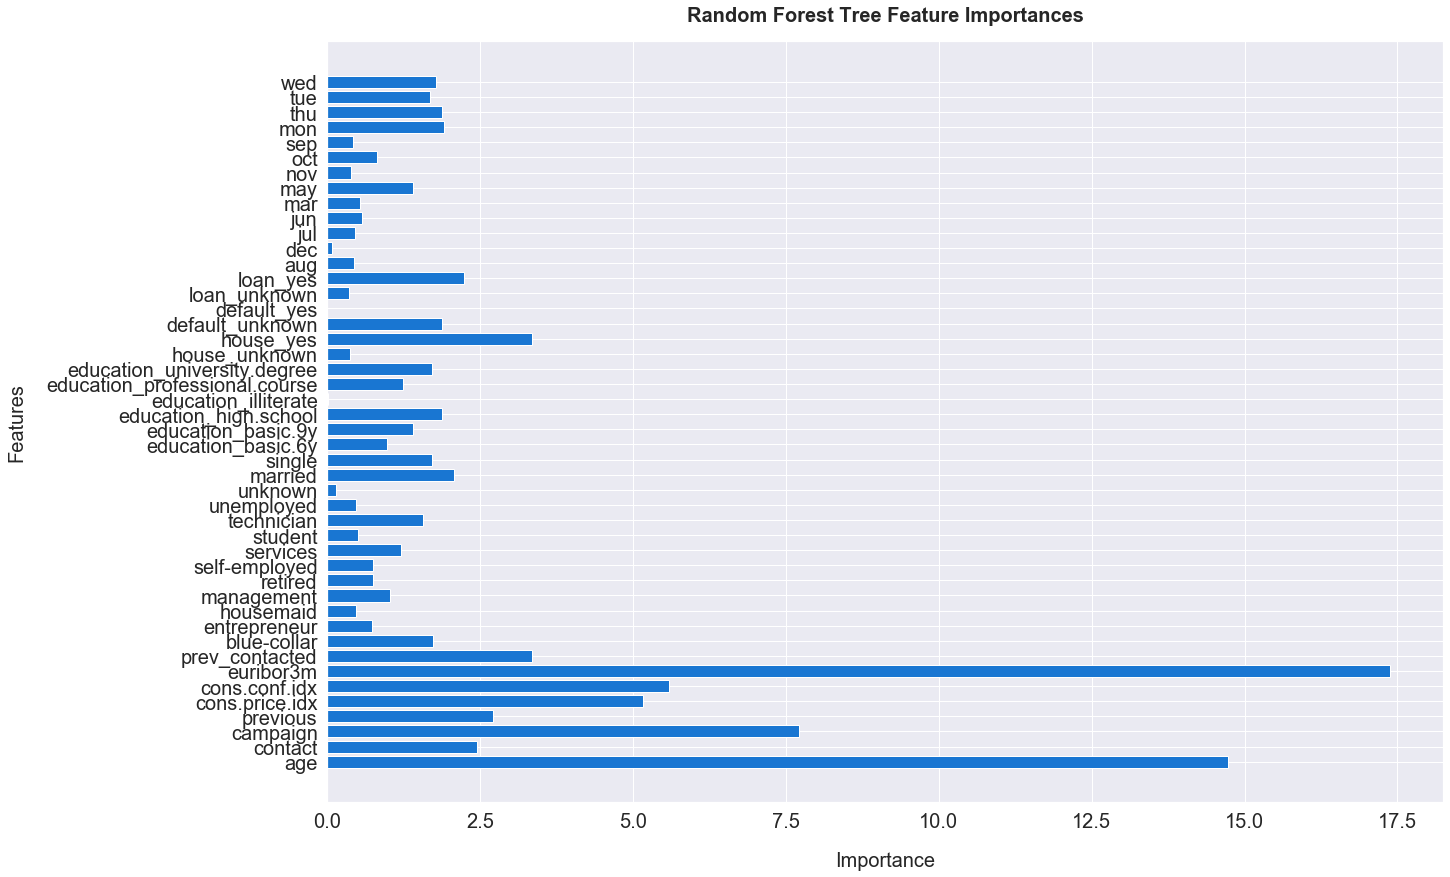

In [121]:
plt.barh(y=list(RFC_importances_table.columns), width=RFC_importances_table.iloc[0], color='#1976D2')
plt.title('Random Forest Tree Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=20, labelpad=20)
plt.ylabel('Features', fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

## Logistic Regression Analysis

In [123]:
def log_reg_equation(actual,features):

    new=actual.copy()
    
    from sklearn.model_selection import train_test_split

    df_train,df_test=train_test_split(new,test_size=0.33,random_state=42)
    
    y_train=df_train['y']
    X_train= df_train.drop(['y'], axis=1)
    
    y_test=df_test['y']
    X_test= df_test.drop(['y'], axis=1)
    
    #sclaer:
    X_train[features]=scaler.fit_transform(X_train[features])
    X_test[features]=scaler.transform(X_test[features])
    
    #model:
    log_baseline=linear_model.LogisticRegression(solver='liblinear')
    log_baseline.fit(X_train,y_train)
    
    log_baseline.predict(X_test)
    
    beta_0 = log_baseline.intercept_[0]
    beta_1_arrary = log_baseline.coef_
    
    probabilties=log_baseline.predict_proba(X_test)[:,1]
    probabilties.reshape(1,len(probabilties))
    
    log_pred_table=pd.DataFrame(probabilties, columns = ['Probability of Customer Subscribing to Product'])
        
    return beta_0,beta_1_arrary,log_pred_table
    
beta_0,beta_1_arrary,log_pred_table=log_reg_equation(onehot_encoded_subset_rus,feature_numerical_sub)


In [124]:
print("Beta 0 is :",beta_0)

Beta 0 is : 0.23654635857796874


In [125]:
#All indenpent varible coefficients: 
beta_1_arrary

array([[-2.05924019e-01, -4.44605332e-01, -1.17271574e+00,
        -1.73090006e+00,  1.51046506e+00,  1.40918298e+00,
        -2.43541090e+00,  1.58623450e+00, -1.08433172e-01,
         7.53237241e-02,  2.83806440e-02, -2.20648825e-01,
         3.08418145e-01,  2.15558994e-02, -5.56034629e-02,
         2.68723586e-01,  3.22428794e-02,  1.04071877e-03,
        -1.05240281e-02,  1.22874550e-01,  1.91884839e-01,
         2.28207278e-01,  7.57204572e-02,  1.04923015e-01,
         2.37230745e-01,  1.37697917e-01,  2.34646061e-01,
        -9.39766319e-02, -5.45285344e-02, -1.09227234e-01,
         0.00000000e+00, -9.39766319e-02, -6.99775790e-02,
        -2.40106556e-01,  6.07157122e-01,  1.23174265e-01,
        -1.95820772e-01,  1.36803712e+00, -7.51093179e-01,
        -8.31075669e-02,  4.61954402e-01, -2.61603999e-01,
        -2.37603463e-01, -5.97115971e-02, -2.50445978e-03,
         4.91466829e-02]])

In [126]:
log_pred_table.head()

,Probability of Customer Subscribing to Product
0,0.682515
1,0.403127
2,0.973025
3,0.799427
4,0.335389


## Grid Search for Random Forest Tunning

In [127]:
#Goal is to find optimal paramters for:

#n_estimators = number of trees in the forest

#max_depth = max number of levels in each decision tree
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [128]:
from sklearn.model_selection import GridSearchCV

grid_search_scoring=['accuracy','f1','recall']

param_test1 = {'n_estimators':range(10,200,10)}  # number of trees

start_total= time.perf_counter()
gsearch1 = GridSearchCV(estimator = ensemble.RandomForestClassifier(),param_grid = param_test1, scoring=grid_search_scoring[2],
                                    n_jobs=1, cv=kfold)

gsearch1.fit(X_sub_rus, y_sub_rus)
run_total = time.perf_counter() - start_total

print("Best Params are:",gsearch1.best_params_)
print("New Random Forest Tree reccal is:", gsearch1.best_score_)
print('Search time was {:.2f} minutes.'.format(run_total/60))

Best Params are: {'n_estimators': 170}
New Random Forest Tree reccall is: 0.6602975114575752
Search time was 2.91 minutes.


In [129]:
param_test_2 = {'max_depth': range(10,100,10)} #Find number of trees in the forest and others

start_total= time.perf_counter()
gsearch2 = GridSearchCV(estimator = ensemble.RandomForestClassifier(n_estimators=170), 
                                    param_grid = param_test_2, scoring=grid_search_scoring[2],
                                        n_jobs=1, cv=kfold)

gsearch2.fit(X_sub_rus, y_sub_rus)
run_total = time.perf_counter() - start_total

print("Best Params are:",gsearch2.best_params_)
print("New Random Forest Tree recall is:", gsearch2.best_score_)
print('Search time was {:.2f} minutes.'.format(run_total/60))

Best Params are: {'max_depth': 50}
New Random Forest Tree recall is: 0.658208464060231
Search time was 2.21 minutes.


## Final Model Selection with Tunned Parameters

In [130]:
#1.Create an empty dataframe to put MLA metrics in

MLA_columns_final = ['MLA Name', 'Independent Variables', 'Model Type','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'Precision Mean' ,'Recall Mean', 'F1 Score Mean']
MLA_columns_final = pd.DataFrame(columns = MLA_columns_final)

In [135]:
#Run models with:
#Tunned Parameters
#Sub Var and All Var on Smote Data... since best scores from intial testing

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

data_groups=['_Subset_Var','_All_Var','_Subset_Var_Rus','_Subset_Var_Smot','_All_Var_Rus','_All_Var_Smot']

MLA = [
        ensemble.RandomForestClassifier(n_estimators=170,max_depth=17),
        linear_model.LogisticRegression(solver='liblinear')
        ]


def classifer_table_final(X,y,features,empty_table,group):

    
    new=empty_table.copy()    

    # index through MLA and save performance to table

    row_index = 0 #this value will update signifying to start the row
    for alg in MLA:

        #set name and varibales
        MLA_name = alg.__class__.__name__+group
        new.loc[row_index, 'MLA Name'] = MLA_name
        
        Model_type = alg.__class__.__name__
        new.loc[row_index, 'Model Type'] = Model_type
        
        #features
        new.loc[row_index, 'Independent Variables'] = str(list(features))
    
        #score model with cross validation Kfolds, using the cv we defined earlier:
        cv_results_accuracy = model_selection.cross_validate(alg, X[features], y[:] , cv  = kfold,return_train_score=True)
        cv_results= model_selection.cross_validate(alg, X[features], y[:], cv=kfold, scoring=scoring)
        
        #then we pull the varous results and put them in our table:
        new.loc[row_index, 'MLA Time'] = cv_results_accuracy['fit_time'].mean()
        new.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results_accuracy['train_score'].mean()
        new.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results_accuracy['test_score'].mean()   
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        new.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results_accuracy['test_score'].std()*3   #let's know the worst that can happen!
        new.loc[row_index, 'Precision Mean'] = np.mean(cv_results['test_precision'])
        new.loc[row_index, 'Recall Mean'] = np.mean(cv_results['test_recall'])
        new.loc[row_index, 'F1 Score Mean'] = np.mean(cv_results['test_f1_score'])
    
        row_index+=1
        
    return new

#Sub and All Rus:

MLA_compare_tot_final=pd.concat([classifer_table_final(X_sub_rus,y_sub_rus,x_features_sub_rus,MLA_columns_final,data_groups[2]),
                                classifer_table_final(X_all_rus,y_all_rus,x_features_all_rus,MLA_columns_final,data_groups[4])],
                                axis=0,ignore_index=True)

-------------------------


Insights:

- Still seeing some overfitting, but it has reduced from 99% train accuracy.
- As train and test accuracy converege, the recall mean decreases 
- Goal is to find that balaance

Why we value Recall the most:

A high recall means our model is good at identifying true positives
True Positive=Customer subscribes to product and our model captures that reality
Cost of making calls is low, so we value the ability to make more calls and potentially classify some clients wrong then miss some clients that would have said yes

In [139]:
MLA_compare_tot_final.sort_values(by = ['Recall Mean'], ascending = False, inplace = True)
MLA_compare_tot_final

,MLA Name,Independent Variables,Model Type,MLA Train Accuracy Mean,MLA Test Accuracy Mean,Precision Mean,Recall Mean,F1 Score Mean,MLA Time,MLA Test Accuracy 3*STD
0,RandomForestClassifier_Subset_Var_Rus,"['age', 'contact', 'campaign', 'previous', 'co...",RandomForestClassifier,0.902606,0.73938,0.806755,0.630856,0.707706,1.150739,0.028731
2,RandomForestClassifier_All_Var_Rus,"['age', 'contact', 'campaign', 'pdays', 'previ...",RandomForestClassifier,0.922656,0.740066,0.800813,0.630764,0.705353,1.256422,0.024723
3,LogisticRegression_All_Var_Rus,"['age', 'contact', 'campaign', 'pdays', 'previ...",LogisticRegression,0.733986,0.732756,0.802789,0.617834,0.697897,0.050413,0.030408
1,LogisticRegression_Subset_Var_Rus,"['age', 'contact', 'campaign', 'previous', 'co...",LogisticRegression,0.731004,0.729672,0.799376,0.613878,0.694129,0.035609,0.030132


In [140]:
data_final=onehot_encoded_subset_rus
x_features_final= x_features_sub_rus
x_features_final

Index(['age', 'contact', 'campaign', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'prev_contacted', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'unknown', 'married',
       'single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'house_unknown', 'house_yes', 'default_unknown', 'default_yes',
       'loan_unknown', 'loan_yes', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [142]:
def rfc_final(actual,features):

    new=actual.copy()
    
    from sklearn.model_selection import train_test_split

    df_train,df_test=train_test_split(new,test_size=0.33,random_state=42)
    
    y_train=df_train['y']
    X_train= df_train.drop(['y'], axis=1)
    
    y_test=df_test['y']
    X_test= df_test.drop(['y'], axis=1)
    
    #sclaer:
    X_train[features]=scaler.fit_transform(X_train[features])
    X_test[features]=scaler.transform(X_test[features])
    
    #model:
    classifier_final=ensemble.RandomForestClassifier(n_estimators=130,max_depth=17)
    classifier_final.fit(X_train,y_train)
    
    classifier_final.predict(X_test)
    
    probabilties_final=classifier_final.predict_proba(X_test)[:,1]
    probabilties_final.reshape(1,len(probabilties_final))
    
    rfc_pred_table=pd.DataFrame(probabilties_final, columns = ['Probability of Customer Subscribing to Product'])
        
    return rfc_pred_table
    
rfc_pred_table=rfc_final(data_final,feature_numerical_sub)

In [143]:
rfc_pred_table.head()

,Probability of Customer Subscribing to Product
0,0.722106
1,0.405317
2,0.986243
3,0.928953
4,0.241611
